<a href="https://colab.research.google.com/github/chernandez87-ux/EstadisticaPY/blob/main/Proyecto_estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

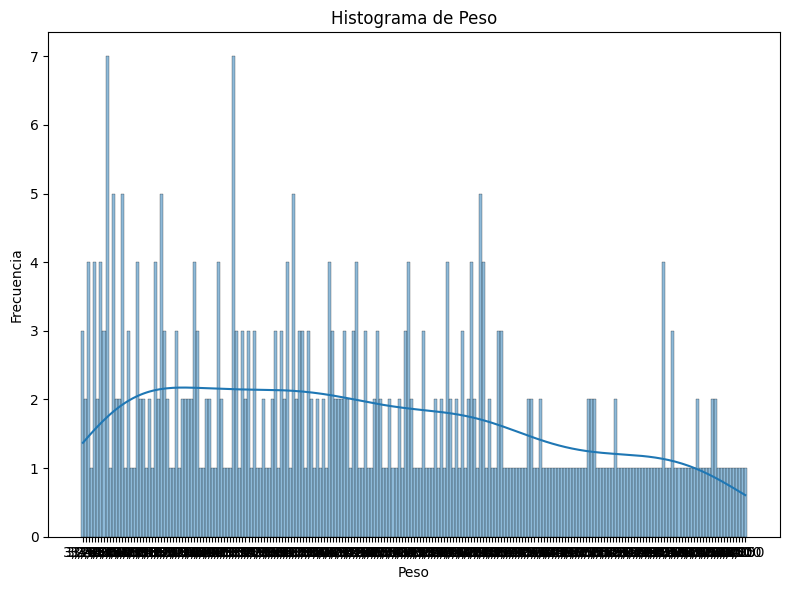

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para Peso
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Peso'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Histograma de Peso')
plt.tight_layout()
plt.show()

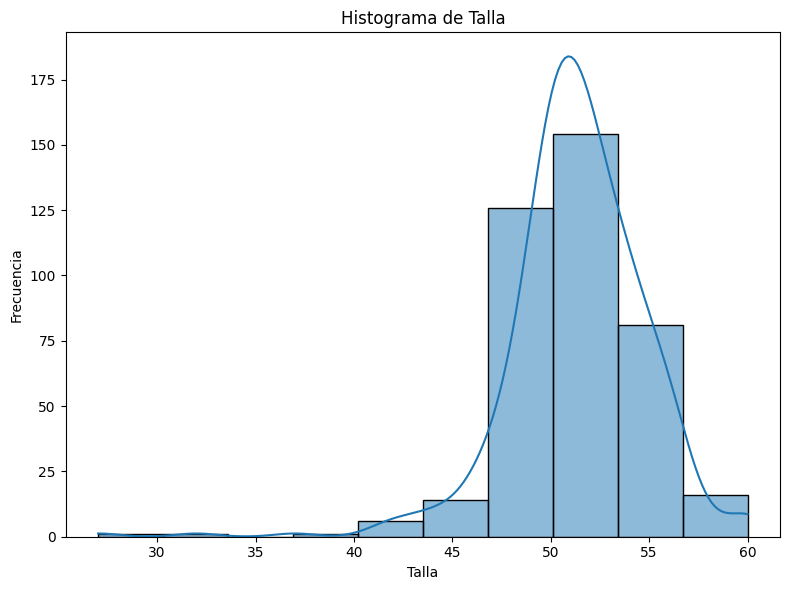

In [ ]:
# Histograma para Talla
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Talla'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Talla')
plt.ylabel('Frecuencia')
plt.title('Histograma de Talla')
plt.tight_layout()
plt.show()

In [ ]:
# Eliminar filas con datos faltantes
df_filtrado = df.dropna()

# Mostrar el número de filas después de la limpieza
print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")

# Identificar y mostrar el número de datos faltantes por columna
faltantes = df_filtrado.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)


Número de filas después de eliminar datos faltantes: 400

Datos faltantes por columna después de la limpieza:
Departamento Nacimiento     0
Municipio Nacimiento        0
Area Nacimiento             0
Cód. IPS                    0
IPS                         0
Sexo                        0
Peso                        0
Talla                       0
Fecha Nacimiento            0
Hora Nacimiento             0
Parto Atendido Por          0
Tiempo Gestación            0
Tipo Parto                  0
Grupo Sanguineo             0
Factor RH                   0
Departamento Residencia     0
Municipio Residencia        0
Área Residencia             0
Régimen Seguridad Social    0
EPS                         0
dtype: int64


/tmp/ipython-input-100982550.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


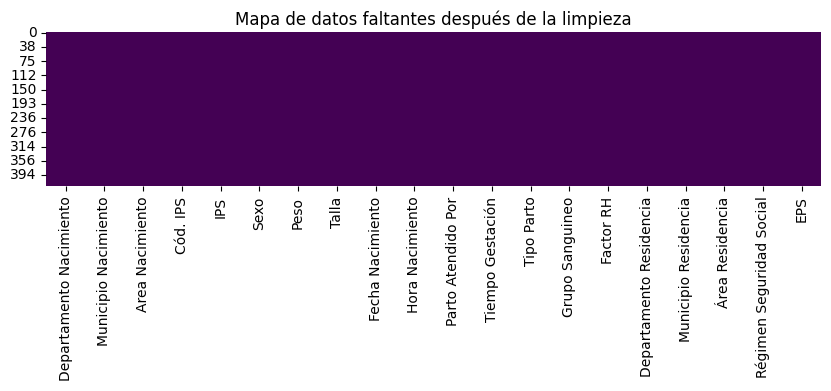

In [ ]:
# Visualizar el mapa de calor de datos faltantes (debería estar vacío si la limpieza fue exitosa)
plt.figure(figsize=(10, 2))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
# plt.savefig("mapa_datos_faltantes.png") # Quitar comentario si se quiere guardar la figura
plt.show()

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
Departamento Nacimiento      0
Municipio Nacimiento         0
Area Nacimiento              0
Cód. IPS                     0
IPS                          0
Sexo                         0
Peso                         0
Talla                        0
Fecha Nacimiento             0
Hora Nacimiento              0
Parto Atendido Por           0
Tiempo Gestación             0
Tipo Parto                   0
Grupo Sanguineo              3
Factor RH                    3
Departamento Residencia      0
Municipio Residencia         0
Área Residencia              0
Régimen Seguridad Social     0
EPS                         23
dtype: int64


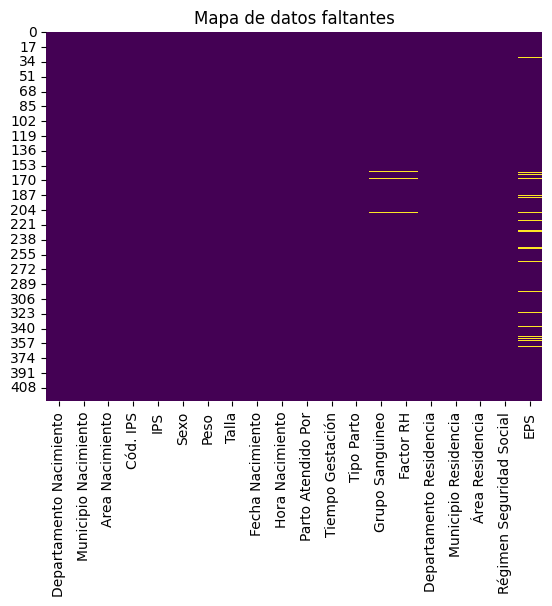

In [ ]:
# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

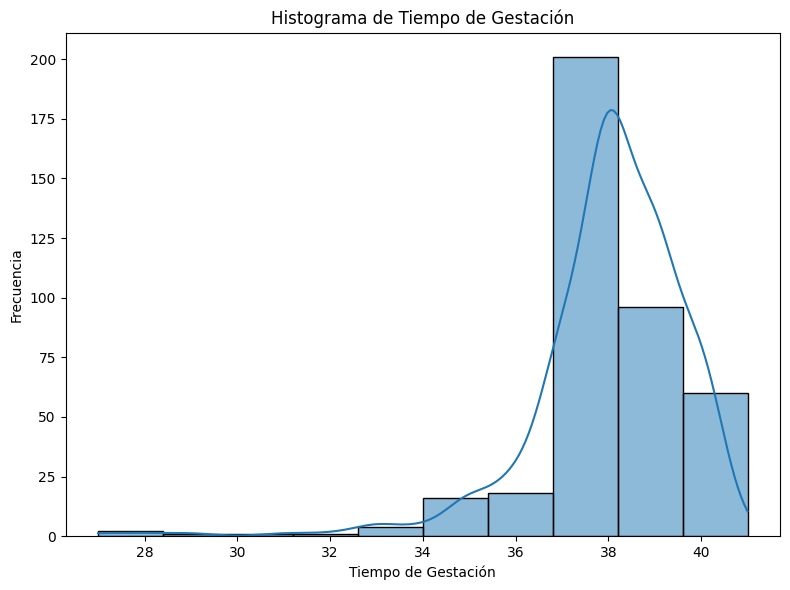

In [ ]:
# Histograma para Tiempo de Gestación
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['Tiempo Gestación'], bins=10, edgecolor='black', kde=True)
plt.xlabel('Tiempo de Gestación')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tiempo de Gestación')
plt.tight_layout()
plt.show()

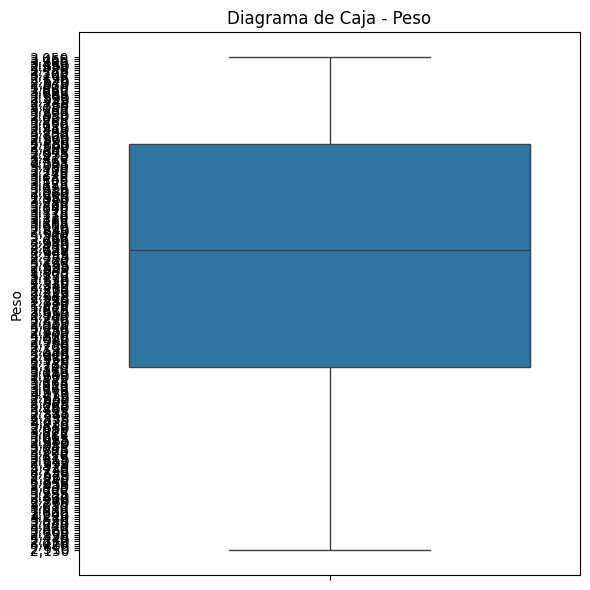

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de caja para Peso
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Peso'])
plt.title('Diagrama de Caja - Peso')
plt.tight_layout()
plt.show()

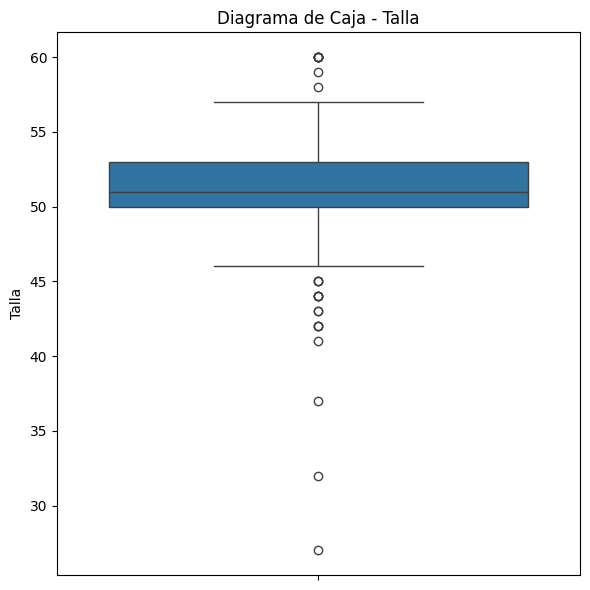

In [ ]:
# Diagrama de caja para Talla
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Talla'])
plt.title('Diagrama de Caja - Talla')
plt.tight_layout()
plt.show()

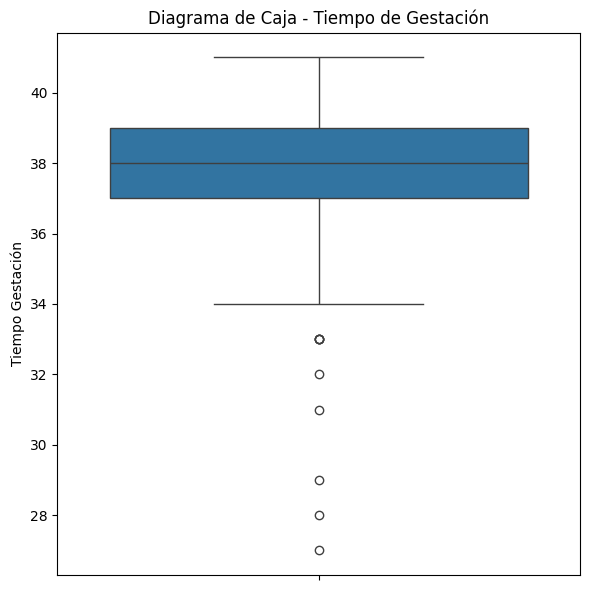

In [ ]:
# Diagrama de caja para Tiempo de Gestación
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado['Tiempo Gestación'])
plt.title('Diagrama de Caja - Tiempo de Gestación')
plt.tight_layout()
plt.show()

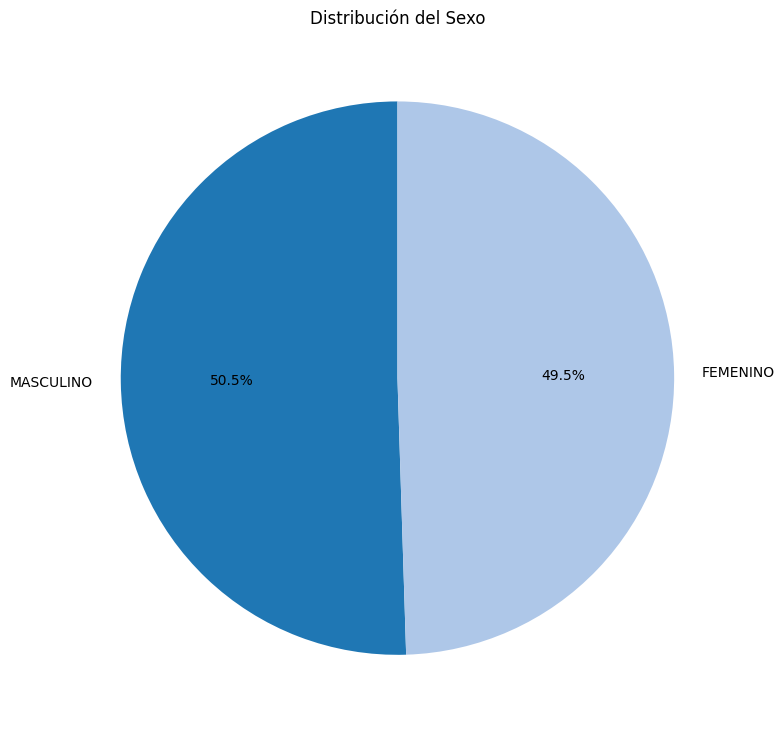

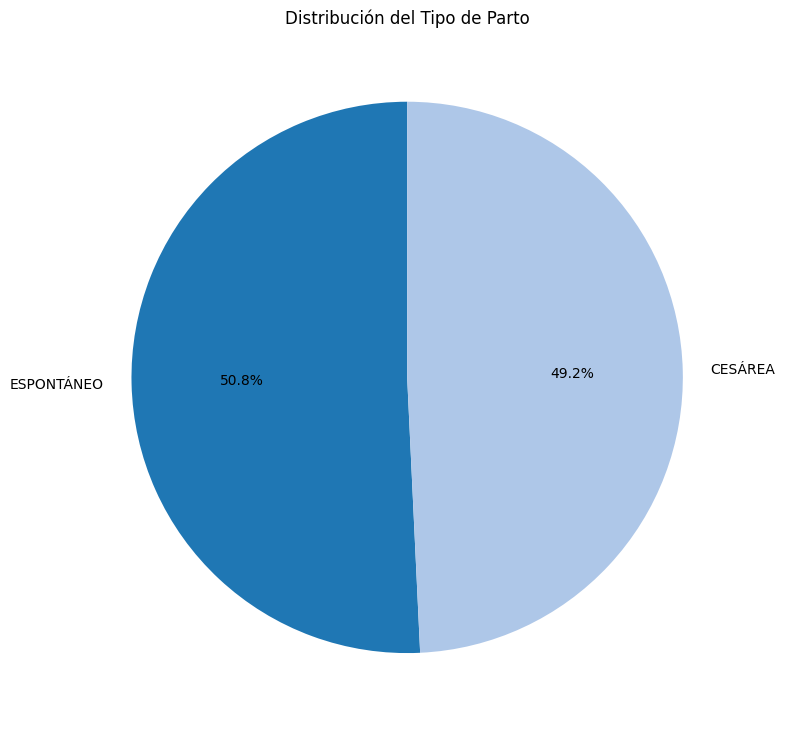

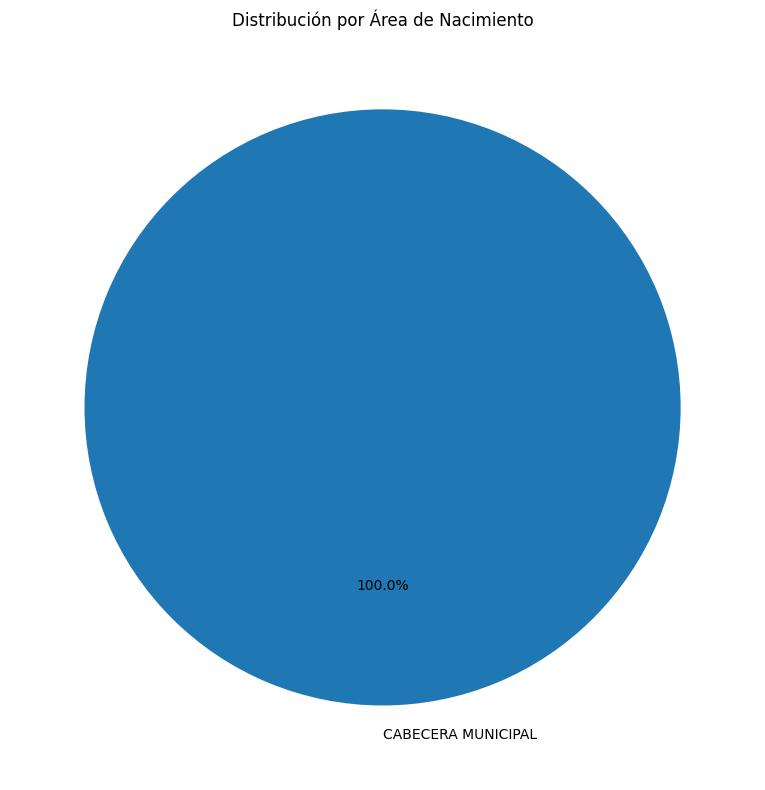

In [ ]:
import matplotlib.pyplot as plt

# Lista de variables categóricas y títulos para los gráficos
categorical_vars = [
    ('Sexo', 'Distribución del Sexo'),
    ('Tipo Parto', 'Distribución del Tipo de Parto'),
    ('Area Nacimiento', 'Distribución por Área de Nacimiento') # Corrected column name and title
]

for var, title in categorical_vars:
    plt.figure(figsize=(8, 8))
    df_filtrado[var].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(title)
    plt.ylabel('')  # Eliminar la etiqueta del eje y
    plt.tight_layout()
    plt.show()

In [ ]:
# Convertir la columna 'Peso' a numérica, manejando comas como decimales
df_filtrado['Peso'] = df_filtrado['Peso'].str.replace(',', '.', regex=False).astype(float)

# Verificar el tipo de dato después de la conversión
print("Tipo de dato de 'Peso' después de la conversión:")
print(df_filtrado['Peso'].dtype)

# Ahora, reejecutar el código para eliminar atípicos
# Calcular Q1, Q3 e IQR para ambas variables en un solo paso
Q1 = df_filtrado[['Talla', 'Peso']].quantile(0.25)
Q3 = df_filtrado[['Talla', 'Peso']].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como atípico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers en ambas variables
condicion = (
    (df_filtrado['Talla'] >= limite_inferior['Talla']) & (df_filtrado['Talla'] <= limite_superior['Talla']) &
    (df_filtrado['Peso'] >= limite_inferior['Peso']) & (df_filtrado['Peso'] <= limite_superior['Peso'])
)
df_sinatipicos = df_filtrado[condicion]

# Mostrar la cantidad de datos restantes
print(f"Número de datos restantes después de eliminar outliers: {len(df_sinatipicos)}")

Tipo de dato de 'Peso' después de la conversión:
float64
Número de datos restantes después de eliminar outliers: 372


/tmp/ipython-input-704156938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Peso'] = df_filtrado['Peso'].str.replace(',', '.', regex=False).astype(float)


In [ ]:
# Calcular Q1, Q3 e IQR para ambas variables en un solo paso
Q1 = df_filtrado[['Talla', 'Peso']].quantile(0.25)
Q3 = df_filtrado[['Talla', 'Peso']].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar un dato como atípico
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers en ambas variables
condicion = (
    (df_filtrado['Talla'] >= limite_inferior['Talla']) & (df_filtrado['Talla'] <= limite_superior['Talla']) &
    (df_filtrado['Peso'] >= limite_inferior['Peso']) & (df_filtrado['Peso'] <= limite_superior['Peso'])
)
df_sinatipicos = df_filtrado[condicion]

# Mostrar la cantidad de datos restantes
print(f"Número de datos restantes después de eliminar outliers: {len(df_sinatipicos)}")

Número de datos restantes después de eliminar outliers: 372


/tmp/ipython-input-447505994.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


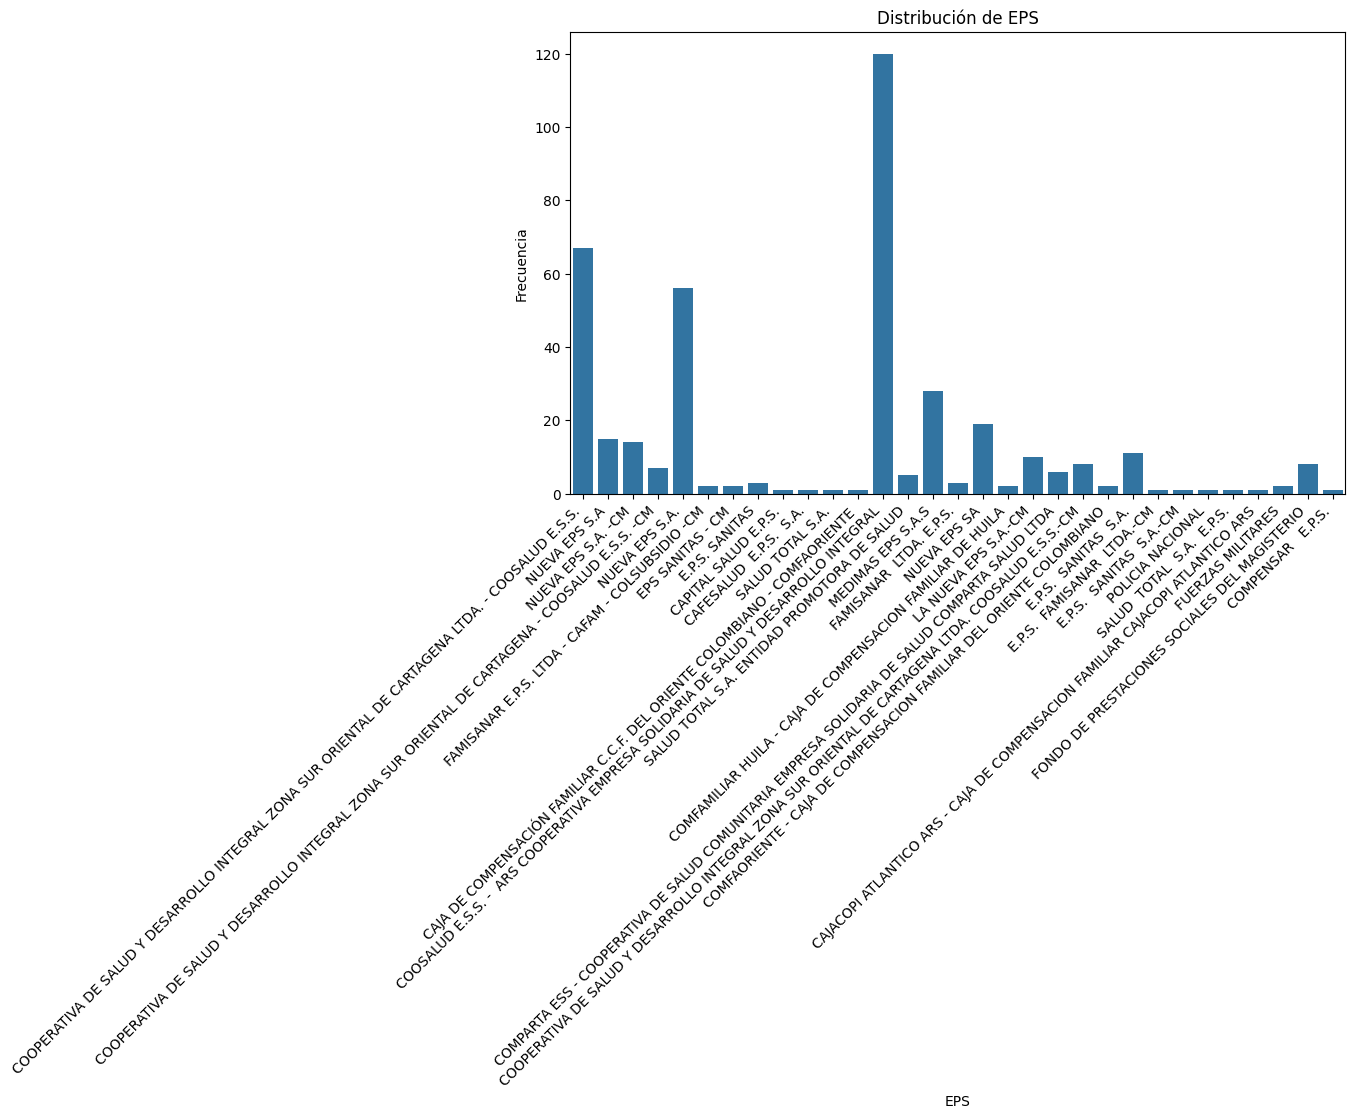

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtrado, x='EPS')
plt.title('Distribución de EPS')
plt.xlabel('EPS')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Mejora la legibilidad de las etiquetas
plt.tight_layout()
plt.show()

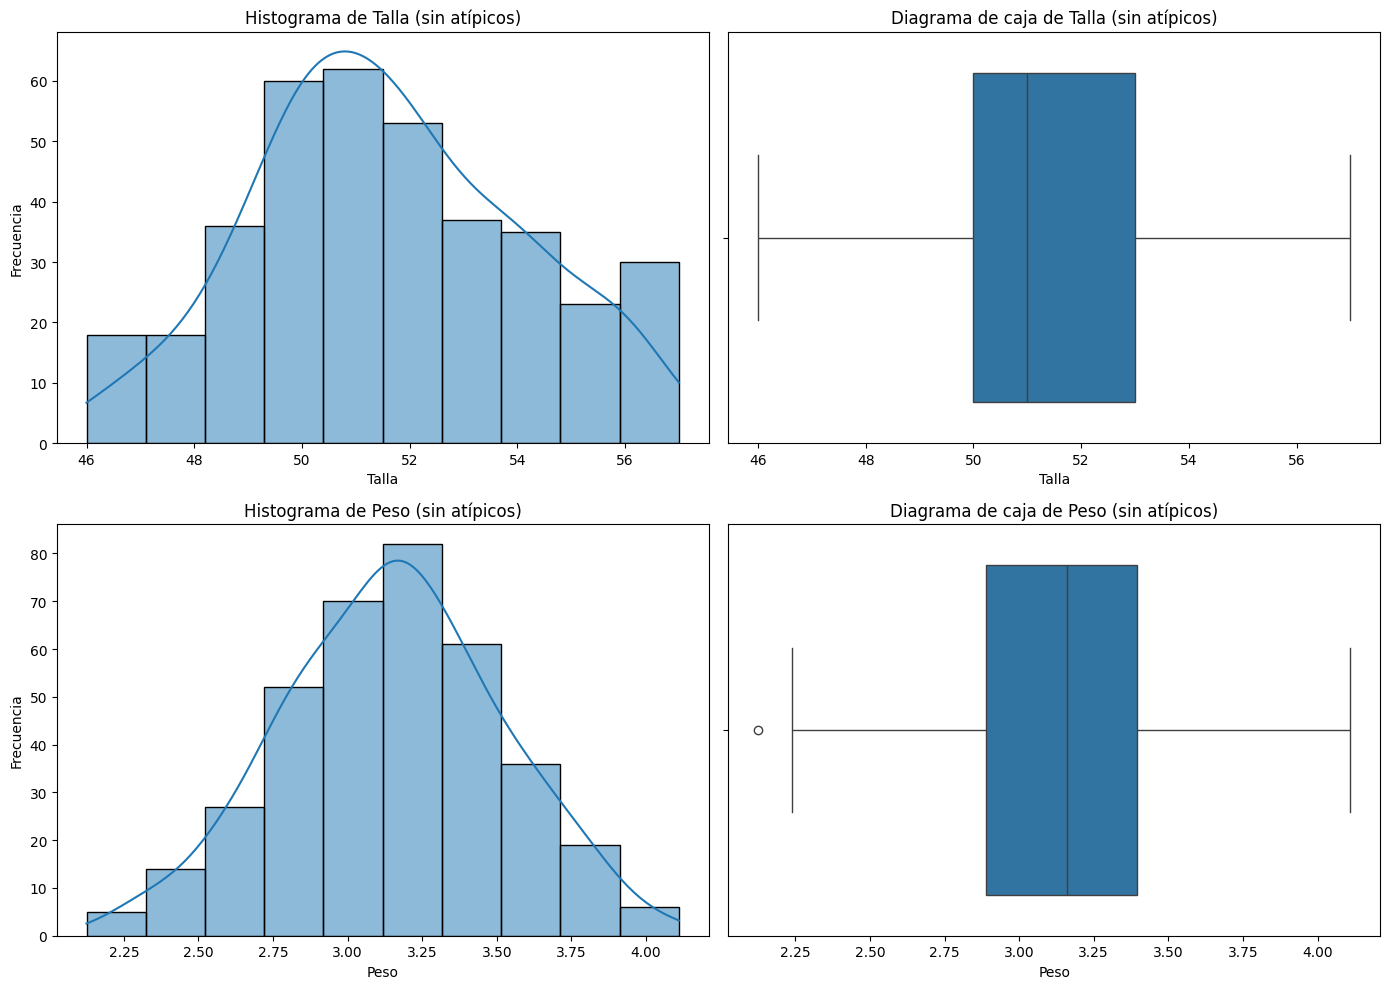

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma y boxplot para Talla
sns.histplot(df_sinatipicos['Talla'], bins=10, edgecolor='black', kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Talla')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Histograma de Talla (sin atípicos)')

sns.boxplot(x=df_sinatipicos['Talla'], ax=axes[0, 1])
axes[0, 1].set_xlabel('Talla')
axes[0, 1].set_title('Diagrama de caja de Talla (sin atípicos)')

# Histograma y boxplot para Peso
sns.histplot(df_sinatipicos['Peso'], bins=10, edgecolor='black', kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Peso')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Histograma de Peso (sin atípicos)')

sns.boxplot(x=df_sinatipicos['Peso'], ax=axes[1, 1])
axes[1, 1].set_xlabel('Peso')
axes[1, 1].set_title('Diagrama de caja de Peso (sin atípicos)')

plt.tight_layout()
plt.show()

Resultados de los tests de normalidad (valores p):

Variable: Talla
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0001
  Anderson-Darling Estadístico: 3.4205, Crítico (5%): 0.7790
  Jarque-Bera p = 0.0893
  → NO es distribución normal (según mayoría de tests)

Variable: Peso
  Shapiro-Wilk p = 0.8122
  Kolmogorov-Smirnov p = 0.9817
  Anderson-Darling Estadístico: 0.1694, Crítico (5%): 0.7790
  Jarque-Bera p = 0.6136
  → Distribución normal (según mayoría de tests)



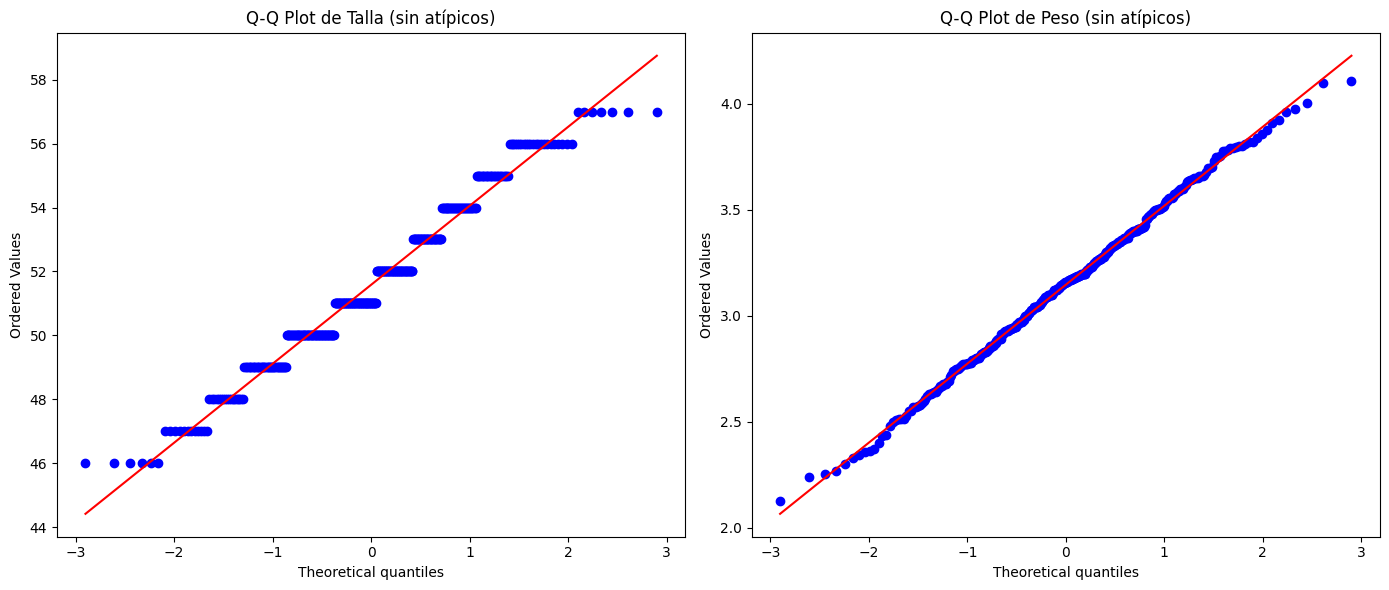

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# Lista de variables a evaluar
columnas_fisicas = ['Talla', 'Peso']

# Diccionario para almacenar resultados
resultados_normalidad = {}

# Evaluar cada variable en df_sinatipicos
for col in columnas_fisicas:
    if col in df_sinatipicos.columns:
        datos = df_sinatipicos[col].dropna() # Usar df_sinatipicos
        # Asegurarse de que los datos son numéricos
        datos = pd.to_numeric(datos, errors='coerce').dropna()

        if len(datos) < 5000: # Shapiro-Wilk es más adecuado para muestras pequeñas
            # Shapiro-Wilk
            stat_sw, p_sw = shapiro(datos)
        else:
            stat_sw, p_sw = np.nan, np.nan # No aplicar si la muestra es muy grande

        # Kolmogorov-Smirnov
        # Kstest requires distribution parameters for 'norm' argument
        media, desv = np.mean(datos), np.std(datos)
        stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))

        # Anderson-Darling
        resultado_ad = anderson(datos)
        stat_ad = resultado_ad.statistic
        # Compare with critical values for 5% significance level
        crit_ad = resultado_ad.critical_values[2] # 5% significance level
        ad_normal = stat_ad < crit_ad

        # Jarque-Bera (requires at least 20 observations, typically used for larger samples)
        if len(datos) >= 20:
            stat_jb, p_jb = jarque_bera(datos)
        else:
            stat_jb, p_jb = np.nan, np.nan

        # Guardar resultados
        resultados_normalidad[col] = {
            'Shapiro-Wilk_p': p_sw,
            'Kolmogorov-Smirnov_p': p_ks,
            'Anderson-Darling_stat': stat_ad,
            'Anderson-Darling_crit_5%': crit_ad,
            'Anderson-Darling_normal': ad_normal,
            'Jarque-Bera_p': p_jb,
            'Es_Normal_SW': p_sw > 0.05 if not np.isnan(p_sw) else 'N/A',
            'Es_Normal_KS': p_ks > 0.05,
            'Es_Normal_AD': ad_normal,
            'Es_Normal_JB': p_jb > 0.05 if not np.isnan(p_jb) else 'N/A'
        }

# Mostrar resultados en tabla
print("Resultados de los tests de normalidad (valores p):\n")
for var, res in resultados_normalidad.items():
    print(f"Variable: {var}")
    print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk_p']:.4f}")
    print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov_p']:.4f}")
    print(f"  Anderson-Darling Estadístico: {res['Anderson-Darling_stat']:.4f}, Crítico (5%): {res['Anderson-Darling_crit_5%']:.4f}")
    print(f"  Jarque-Bera p = {res['Jarque-Bera_p']:.4f}")

    # Determine normality based on p-values (alpha = 0.05)
    normal_counts = 0
    if not np.isnan(res['Shapiro-Wilk_p']) and res['Shapiro-Wilk_p'] > 0.05: normal_counts += 1
    if res['Kolmogorov-Smirnov_p'] > 0.05: normal_counts += 1
    if res['Anderson-Darling_normal']: normal_counts += 1
    if not np.isnan(res['Jarque-Bera_p']) and res['Jarque-Bera_p'] > 0.05: normal_counts += 1

    if normal_counts >= 3: # Criteria for 'majority'
        print("  → Distribución normal (según mayoría de tests)\n")
    else:
        print("  → NO es distribución normal (según mayoría de tests)\n")

# Gráficos QQ para cada variable
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, col in enumerate(columnas_fisicas):
    if col in df_sinatipicos.columns:
        datos = df_sinatipicos[col].dropna()
        datos = pd.to_numeric(datos, errors='coerce').dropna()
        if not datos.empty:
            probplot(datos, dist="norm", plot=axes[i])
            axes[i].set_title(f'Q-Q Plot de {col} (sin atípicos)')
        else:
            axes[i].set_title(f'No hay datos para {col}')
            axes[i].text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()

In [ ]:
#!/usr/bin/env python3
"""
Análisis Estadístico de Datos de Nacimientos
Análisis exploratorio completo con medidas de tendencia central y dispersión
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 10})

class AnalizadorNacimientos:
    def __init__(self, archivo_csv):
        self.archivo = archivo_csv
        self.df_original = None
        self.df_filtrado = None
        self.df_sinatipicos = None
        self.variables_numericas = ['Peso', 'Talla', 'Tiempo Gestación'] # Corrected column name
        # Corrected categorical variables based on current dataset. Multiplicidad_Embarazo not found.
        self.variables_categoricas = ['Sexo', 'Tipo Parto', 'Area Nacimiento']

    def cargar_datos(self):
        print("="*60)
        print("CARGANDO Y EXPLORANDO DATOS")
        print("="*60)
        try:
            # Using the correct CSV file name from previous interactions
            self.df_original = pd.read_csv(self.archivo)
            print(f"✓ Archivo cargado exitosamente: {self.archivo}")
            print(f"✓ Dimensiones del dataset: {self.df_original.shape}")
            print("\n--- INFORMACIÓN DEL DATASET ---")
            self.df_original.info()
            print("\n--- PRIMERAS 5 FILAS ---")
            print(self.df_original.head())
            print("\n--- RESUMEN ESTADÍSTICO ---")
            print(self.df_original.describe(include='all'))
        except FileNotFoundError:
            print(f"❌ Error: No se encontró el archivo {self.archivo}")
            return False
        except Exception as e:
            print(f"❌ Error al cargar el archivo: {e}")
            return False
        return True

    def limpiar_datos(self):
        print("\n" + "="*60)
        print("LIMPIEZA DE DATOS")
        print("="*60)

        # 1. Manejo de valores faltantes
        print("\n--- VALORES FALTANTES (ORIGINAL) ---")
        faltantes_original = self.df_original.isnull().sum()
        print(faltantes_original[faltantes_original > 0])
        if faltantes_original.sum() > 0:
            print("\nVisualizando datos faltantes (heatmap original):")
            plt.figure(figsize=(10, 3))
            sns.heatmap(self.df_original.isnull(), cbar=False, cmap="viridis")
            plt.title("Mapa de Datos Faltantes (Original)")
            plt.show()
            print("Eliminando filas con datos faltantes...")
            self.df_filtrado = self.df_original.dropna().copy() # Usar .copy() para evitar SettingWithCopyWarning
            print(f"Número de filas después de eliminar faltantes: {self.df_filtrado.shape[0]}")
            print("Verificando datos faltantes después de la eliminación:")
            faltantes_despues = self.df_filtrado.isnull().sum()
            print(faltantes_despues[faltantes_despues > 0])
            if faltantes_despues.sum() == 0:
                print("✓ No hay valores faltantes después de la limpieza.")
            else:
                print("❌ Aún quedan valores faltantes.")
            print("Visualizando datos faltantes (heatmap después de limpieza):")
            plt.figure(figsize=(10, 3))
            sns.heatmap(self.df_filtrado.isnull(), cbar=False, cmap="viridis")
            plt.title("Mapa de Datos Faltantes (Después de Limpieza)")
            plt.show()
        else:
            print("✓ No hay valores faltantes en el dataset original.")
            self.df_filtrado = self.df_original.copy() # Si no hay faltantes, df_filtrado es una copia del original

        # 2. Conversión de tipos de datos (especialmente 'Peso')
        print("\n--- CONVERSIÓN DE TIPOS DE DATOS ---")
        if 'Peso' in self.df_filtrado.columns and self.df_filtrado['Peso'].dtype == 'object':
            print("Convirtiendo la columna 'Peso' a numérica...")
            # Reemplazar comas por puntos y convertir a float
            self.df_filtrado['Peso'] = self.df_filtrado['Peso'].str.replace(',', '.', regex=False).astype(float)
            print(f"✓ 'Peso' convertido a tipo: {self.df_filtrado['Peso'].dtype}")
        else:
            print("✓ La columna 'Peso' ya es numérica o no existe.")

        # 3. Detección y eliminación de atípicos (outliers) para 'Talla' y 'Peso'
        print("\n--- DETECCIÓN Y ELIMINACIÓN DE ATÍPICOS ---")
        if 'Talla' in self.df_filtrado.columns and 'Peso' in self.df_filtrado.columns:
            Q1 = self.df_filtrado[['Talla', 'Peso']].quantile(0.25)
            Q3 = self.df_filtrado[['Talla', 'Peso']].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            condicion_outliers = (
                (self.df_filtrado['Talla'] >= limite_inferior['Talla']) & (self.df_filtrado['Talla'] <= limite_superior['Talla']) &
                (self.df_filtrado['Peso'] >= limite_inferior['Peso']) & (self.df_filtrado['Peso'] <= limite_superior['Peso'])
            )
            self.df_sinatipicos = self.df_filtrado[condicion_outliers].copy() # Usar .copy() para evitar SettingWithCopyWarning

            num_outliers = self.df_filtrado.shape[0] - self.df_sinatipicos.shape[0]
            print(f"Se encontraron y eliminaron {num_outliers} atípicos en 'Talla' y 'Peso'.")
            print(f"Número de filas después de eliminar atípicos: {self.df_sinatipicos.shape[0]}")

            print("Visualizando distribuciones después de eliminar atípicos:")
            fig, axes = plt.subplots(2, 2, figsize=(14, 10))

            sns.histplot(self.df_sinatipicos['Talla'], bins=10, edgecolor='black', kde=True, ax=axes[0, 0])
            axes[0, 0].set_title('Histograma de Talla (sin atípicos)')
            sns.boxplot(x=self.df_sinatipicos['Talla'], ax=axes[0, 1])
            axes[0, 1].set_title('Diagrama de Caja de Talla (sin atípicos)')

            sns.histplot(self.df_sinatipicos['Peso'], bins=10, edgecolor='black', kde=True, ax=axes[1, 0])
            axes[1, 0].set_title('Histograma de Peso (sin atípicos)')
            sns.boxplot(x=self.df_sinatipicos['Peso'], ax=axes[1, 1])
            axes[1, 1].set_title('Diagrama de Caja de Peso (sin atípicos)')

            plt.tight_layout()
            plt.show()
        else:
            print("❌ Las columnas 'Talla' o 'Peso' no están presentes para detectar atípicos.")
            self.df_sinatipicos = self.df_filtrado.copy()

        return True


# Task
```python
#!/usr/bin/env python3
"""
Análisis Estadístico de Datos de Nacimientos
Análisis exploratorio completo con medidas de tendencia central y dispersión
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 10})

class AnalizadorNacimientos:
    def __init__(self, archivo_csv):
        self.archivo = archivo_csv
        self.df_original = None
        self.df_filtrado = None
        self.df_sinatipicos = None
        self.variables_numericas = ['Peso', 'Talla', 'Tiempo Gestación']
        self.variables_categoricas = ['Sexo', 'Tipo Parto', 'Area Nacimiento', 'Departamento Nacimiento',
                                      'Municipio Nacimiento', 'Parto Atendido Por', 'Grupo Sanguineo',
                                      'Factor RH', 'Departamento Residencia', 'Municipio Residencia',
                                      'Área Residencia', 'Régimen Seguridad Social', 'EPS']

    def cargar_datos(self):
        print("="*60)
        print("CARGANDO Y EXPLORANDO DATOS")
        print("="*60)
        try:
            self.df_original = pd.read_csv(self.archivo)
            print(f"✓ Archivo cargado exitosamente: {self.archivo}")
            print(f"✓ Dimensiones del dataset: {self.df_original.shape}")
            print("\n--- INFORMACIÓN DEL DATASET ---")
            self.df_original.info()
            print("\n--- PRIMERAS 5 FILAS ---")
            print(self.df_original.head())
            print("\n--- RESUMEN ESTADÍSTICO ---")
            print(self.df_original.describe(include='all'))
        except FileNotFoundError:
            print(f"❌ Error: No se encontró el archivo {self.archivo}")
            return False
        except Exception as e:
            print(f"❌ Error al cargar el archivo: {e}")
            return False
        return True

    def limpiar_datos(self):
        print("\n" + "="*60)
        print("LIMPIEZA DE DATOS (Faltantes y Tipo de Datos)")
        print("="*60)

        # 1. Manejo de valores faltantes
        print("\n--- VALORES FALTANTES (ORIGINAL) ---")
        faltantes_original = self.df_original.isnull().sum()
        print(faltantes_original[faltantes_original > 0])
        if faltantes_original.sum() > 0:
            print("\nVisualizando datos faltantes (heatmap original):")
            plt.figure(figsize=(10, 3))
            sns.heatmap(self.df_original.isnull(), cbar=False, cmap="viridis")
            plt.title("Mapa de Datos Faltantes (Original)")
            plt.show()
            print("Eliminando filas con datos faltantes...")
            self.df_filtrado = self.df_original.dropna().copy()
            print(f"Número de filas después de eliminar faltantes: {self.df_filtrado.shape[0]}")
            print("Verificando datos faltantes después de la eliminación:")
            faltantes_despues = self.df_filtrado.isnull().sum()
            print(faltantes_despues[faltantes_despues > 0])
            if faltantes_despues.sum() == 0:
                print("✓ No hay valores faltantes después de la limpieza.")
            else:
                print("❌ Aún quedan valores faltantes.")
            print("Visualizando datos faltantes (heatmap después de limpieza):")
            plt.figure(figsize=(10, 3))
            sns.heatmap(self.df_filtrado.isnull(), cbar=False, cmap="viridis")
            plt.title("Mapa de Datos Faltantes (Después de Limpieza)")
            plt.show()
        else:
            print("✓ No hay valores faltantes en el dataset original.")
            self.df_filtrado = self.df_original.copy()

        # 2. Conversión de tipos de datos (especialmente 'Peso')
        print("\n--- CONVERSIÓN DE TIPOS DE DATOS ---")
        if 'Peso' in self.df_filtrado.columns and self.df_filtrado['Peso'].dtype == 'object':
            print("Convirtiendo la columna 'Peso' a numérica...")
            # Reemplazar comas por puntos y convertir a float
            self.df_filtrado['Peso'] = self.df_filtrado['Peso'].str.replace(',', '.', regex=False).astype(float)
            print(f"✓ 'Peso' convertido a tipo: {self.df_filtrado['Peso'].dtype}")
        else:
            print("✓ La columna 'Peso' ya es numérica o no existe.")
        
        # Ensure 'Tiempo Gestación' is numeric
        if 'Tiempo Gestación' in self.df_filtrado.columns:
            if self.df_filtrado['Tiempo Gestación'].dtype == 'object':
                print("Convirtiendo la columna 'Tiempo Gestación' a numérica...")
                self.df_filtrado['Tiempo Gestación'] = pd.to_numeric(self.df_filtrado['Tiempo Gestación'], errors='coerce')
                self.df_filtrado.dropna(subset=['Tiempo Gestación'], inplace=True) # Drop rows where conversion failed
                print(f"✓ 'Tiempo Gestación' convertido a tipo: {self.df_filtrado['Tiempo Gestación'].dtype}")
            elif not pd.api.types.is_numeric_dtype(self.df_filtrado['Tiempo Gestación']):
                 print(f"La columna 'Tiempo Gestación' es de tipo {self.df_filtrado['Tiempo Gestación'].dtype} y se intentará convertir.")
                 self.df_filtrado['Tiempo Gestación'] = pd.to_numeric(self.df_filtrado['Tiempo Gestación'], errors='coerce')
                 self.df_filtrado.dropna(subset=['Tiempo Gestación'], inplace=True)
                 print(f"✓ 'Tiempo Gestación' convertido a tipo: {self.df_filtrado['Tiempo Gestación'].dtype}")
            else:
                print("✓ La columna 'Tiempo Gestación' ya es numérica.")

        return True

    def eliminar_outliers(self):
        print("\n" + "="*60)
        print("ELIMINACIÓN DE ATÍPICOS (OUTLIERS)")
        print("="*60)
        if self.df_filtrado is None:
            print("❌ Error: No hay datos filtrados. Ejecute 'limpiar_datos' primero.")
            return False

        if 'Talla' in self.df_filtrado.columns and 'Peso' in self.df_filtrado.columns:
            Q1 = self.df_filtrado[['Talla', 'Peso']].quantile(0.25)
            Q3 = self.df_filtrado[['Talla', 'Peso']].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            condicion_outliers = (
                (self.df_filtrado['Talla'] >= limite_inferior['Talla']) & (self.df_filtrado['Talla'] <= limite_superior['Talla']) &
                (self.df_filtrado['Peso'] >= limite_inferior['Peso']) & (self.df_filtrado['Peso'] <= limite_superior['Peso'])
            )
            self.df_sinatipicos = self.df_filtrado[condicion_outliers].copy()

            num_outliers = self.df_filtrado.shape[0] - self.df_sinatipicos.shape[0]
            print(f"Se encontraron y eliminaron {num_outliers} atípicos en 'Talla' y 'Peso'.")
            print(f"Número de filas después de eliminar atípicos: {self.df_sinatipicos.shape[0]}")

            print("Visualizando distribuciones después de eliminar atípicos:")
            fig, axes = plt.subplots(2, 2, figsize=(14, 10))

            sns.histplot(self.df_sinatipicos['Talla'], bins=10, edgecolor='black', kde=True, ax=axes[0, 0])
            axes[0, 0].set_title('Histograma de Talla (sin atípicos)')
            sns.boxplot(x=self.df_sinatipicos['Talla'], ax=axes[0, 1])
            axes[0, 1].set_title('Diagrama de Caja de Talla (sin atípicos)')

            sns.histplot(self.df_sinatipicos['Peso'], bins=10, edgecolor='black', kde=True, ax=axes[1, 0])
            axes[1, 0].set_title('Histograma de Peso (sin atípicos)')
            sns.boxplot(x=self.df_sinatipicos['Peso'], ax=axes[1, 1])
            axes[1, 1].set_title('Diagrama de Caja de Peso (sin atípicos)')

            plt.tight_layout()
            plt.show()
        else:
            print("❌ Las columnas 'Talla' o 'Peso' no están presentes para detectar atípicos.")
            self.df_sinatipicos = self.df_filtrado.copy()
        return True

    def analizar_normalidad(self):
        print("\n" + "="*60)
        print("ANÁLISIS DE NORMALIDAD PARA VARIABLES NUMÉRICAS")
        print("="*60)
        if self.df_sinatipicos is None:
            print("❌ Error: No hay datos sin atípicos. Ejecute 'eliminar_outliers' primero.")
            return False

        resultados_normalidad = {}

        for col in self.variables_numericas:
            if col in self.df_sinatipicos.columns:
                datos = self.df_sinatipicos[col].dropna()
                datos = pd.to_numeric(datos, errors='coerce').dropna()

                if datos.empty:
                    print(f"Skipping normality test for {col}: No valid numerical data.")
                    continue
                if len(datos) < 3:
                    print(f"Skipping normality test for {col}: Not enough data points ({len(datos)} < 3).")
                    continue

                # Shapiro-Wilk Test (good for n < 5000)
                if len(datos) < 5000:
                    stat_sw, p_sw = shapiro(datos)
                else:
                    stat_sw, p_sw = np.nan, np.nan

                # Kolmogorov-Smirnov Test (against a normal distribution fitted to the data)
                mean_data, std_data = np.mean(datos), np.std(datos)
                # Check for zero std_data to avoid division by zero in kstest if all values are identical
                if std_data == 0:
                    print(f"Skipping K-S test for {col}: Standard deviation is zero (all values are identical).")
                    stat_ks, p_ks = np.nan, np.nan
                else:
                    stat_ks, p_ks = kstest(datos, "norm", args=(mean_data, std_data))

                # Anderson-Darling Test
                result_ad = anderson(datos)
                stat_ad = result_ad.statistic
                crit_ad_5 = result_ad.critical_values[2] # 5% significance level
                ad_normal = stat_ad < crit_ad_5

                # Jarque-Bera Test (good for n > 20)
                if len(datos) >= 20:
                    stat_jb, p_jb = jarque_bera(datos)
                else:
                    stat_jb, p_jb = np.nan, np.nan

                resultados_normalidad[col] = {
                    'Shapiro-Wilk_p': p_sw,
                    'Kolmogorov-Smirnov_p': p_ks,
                    'Anderson-Darling_stat': stat_ad,
                    'Anderson-Darling_crit_5%': crit_ad_5,
                    'Anderson-Darling_normal': ad_normal,
                    'Jarque-Bera_p': p_jb,
                    'Es_Normal_SW': p_sw > 0.05 if not np.isnan(p_sw) else 'N/A',
                    'Es_Normal_KS': p_ks > 0.05 if not np.isnan(p_ks) else 'N/A',
                    'Es_Normal_AD': ad_normal,
                    'Es_Normal_JB': p_jb > 0.05 if not np.isnan(p_jb) else 'N/A'
                }

        print("Resultados de los tests de normalidad (valores p):\n")
        fig_qq, axes_qq = plt.subplots(1, len(self.variables_numericas), figsize=(7 * len(self.variables_numericas), 6))
        if len(self.variables_numericas) == 1:
            axes_qq = [axes_qq]

        for i, col in enumerate(self.variables_numericas):
            if col in resultados_normalidad:
                res = resultados_normalidad[col]
                print(f"Variable: {col}")
                print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk_p']:.4f}")
                print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov_p']:.4f}")
                print(f"  Anderson-Darling Estadístico: {res['Anderson-Darling_stat']:.4f}, Crítico (5%): {res['Anderson-Darling_crit_5%']:.4f}")
                print(f"  Jarque-Bera p = {res['Jarque-Bera_p']:.4f}")

                normal_counts = 0
                if not isinstance(res['Es_Normal_SW'], str) and res['Es_Normal_SW']: normal_counts += 1
                if not isinstance(res['Es_Normal_KS'], str) and res['Es_Normal_KS']: normal_counts += 1
                if res['Es_Normal_AD']: normal_counts += 1
                if not isinstance(res['Es_Normal_JB'], str) and res['Es_Normal_JB']: normal_counts += 1

                if normal_counts >= 2:
                    print("  → Distribución normal (según la mayoría de los tests)\n")
                else:
                    print("  → NO es distribución normal (según la mayoría de los tests)\n")
                
                # Q-Q plot
                datos_qq = self.df_sinatipicos[col].dropna()
                datos_qq = pd.to_numeric(datos_qq, errors='coerce').dropna()
                if not datos_qq.empty:
                    probplot(datos_qq, dist="norm", plot=axes_qq[i])
                    axes_qq[i].set_title(f'Q-Q Plot de {col} (sin atípicos)')
                else:
                    axes_qq[i].set_title(f'No hay datos para {col}')
                    axes_qq[i].text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=axes_qq[i].transAxes)
            else:
                axes_qq[i].set_title(f'Columna {col} no procesada')
                axes_qq[i].text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=axes_qq[i].transAxes)

        plt.tight_layout()
        plt.show()
        return True


    def crear_histogramas(self):
        print("\n" + "="*60)
        print("VISUALIZACIÓN: HISTOGRAMAS, DIAGRAMAS DE CAJA Y GRÁFICOS DE PIE")
        print("="*60)
        if self.df_sinatipicos is None:
            print("❌ Error: No hay datos sin atípicos. Ejecute 'eliminar_outliers' primero.")
            return False

        print("\n--- Histogramas para Variables Numéricas ---")
        for var in self.variables_numericas:
            if var in self.df_sinatipicos.columns and not self.df_sinatipicos[var].empty:
                plt.figure(figsize=(8, 6))
                sns.histplot(self.df_sinatipicos[var], bins=10, edgecolor='black', kde=True)
                plt.xlabel(var)
                plt.ylabel('Frecuencia')
                plt.title(f'Histograma de {var} (sin atípicos)')
                plt.tight_layout()
                plt.show()
            else:
                print(f"❌ La columna numérica '{var}' no se encontró o está vacía en el DataFrame sin atípicos.")

        print("\n--- Diagramas de Caja para Variables Numéricas ---")
        for var in self.variables_numericas:
            if var in self.df_sinatipicos.columns and not self.df_sinatipicos[var].empty:
                plt.figure(figsize=(6, 6))
                sns.boxplot(y=self.df_sinatipicos[var])
                plt.title(f'Diagrama de Caja - {var} (sin atípicos)')
                plt.tight_layout()
                plt.show()
            else:
                print(f"❌ La columna numérica '{var}' no se encontró o está vacía en el DataFrame sin atípicos.")

        print("\n--- Gráficos de Frecuencia/Pie para Variables Categóricas (Top N) ---")
        # For categorical, it's often better to show count plots for variables with many unique values,
        # and pie charts only for those with few (e.g., Sexo, Area Nacimiento).
        for var in self.variables_categoricas:
            if var in self.df_sinatipicos.columns and not self.df_sinatipicos[var].empty:
                num_unique = self.df_sinatipicos[var].nunique()
                if num_unique <= 10: # Use pie chart for few unique values
                    plt.figure(figsize=(8, 8))
                    self.df_sinatipicos[var].value_counts().plot.pie(
                        autopct='%1.1f%%',
                        startangle=90,
                        colors=plt.cm.tab20.colors
                    )
                    plt.title(f'Distribución de {var}')
                    plt.ylabel('')
                    plt.tight_layout()
                    plt.show()
                elif num_unique > 10 and num_unique <= 50: # Use countplot for more unique values, show top N
                    plt.figure(figsize=(12, 6))
                    top_n = self.df_sinatipicos[var].value_counts().head(10) # Show top 10
                    sns.barplot(x=top_n.index, y=top_n.values, palette='viridis')
                    plt.title(f'Top 10 Distribución de {var}')
                    plt.xlabel(var)
                    plt.ylabel('Frecuencia')
                    plt.xticks(rotation=45, ha='right')
                    plt.tight_layout()
                    plt.show()
                else:
                    print(f"La columna categórica '{var}' tiene {num_unique} valores únicos, no se generará gráfico para evitar aglomeración.")
            else:
                print(f"❌ La columna categórica '{var}' no se encontró o está vacía en el DataFrame sin atípicos.")
        return True

    def calcular_estadisticas(self):
        print("\n" + "="*60)
        print("CÁLCULO DE ESTADÍSTICAS DESCRIPTIVAS")
        print("="*60)
        if self.df_sinatipicos is None:
            print("❌ Error: No hay datos sin atípicos. Ejecute 'eliminar_outliers' primero.")
            return False

        print("\n--- Estadísticas Descriptivas para Variables Numéricas ---")
        numeric_cols_present = [col for col in self.variables_numericas if col in self.df_sinatipicos.columns]
        if numeric_cols_present:
            print(self.df_sinatipicos[numeric_cols_present].describe())
        else:
            print("No se encontraron variables numéricas para calcular estadísticas.")

        print("\n--- Conteo de Frecuencias para Variables Categóricas ---")
        for var in self.variables_categoricas:
            if var in self.df_sinatipicos.columns and not self.df_sinatipicos[var].empty:
                print(f"\nColumna: {var}")
                print(self.df_sinatipicos[var].value_counts())
                print("-" * 30)
            else:
                print(f"❌ La columna categórica '{var}' no se encontró o está vacía.")
        return True

    def ejecutar_analisis_completo(self):
        print("\n" + "="*60)
        print("INICIANDO ANÁLISIS COMPLETO DE DATOS DE NACIMIENTOS")
        print("="*60)
        if not self.cargar_datos():
            return "El análisis no pudo completarse debido a un error de carga de datos."
        if not self.limpiar_datos():
            return "El análisis no pudo completarse debido a un error en la limpieza de datos."
        if not self.eliminar_outliers():
            return "El análisis no pudo completarse debido a un error en la eliminación de atípicos."
        if not self.analizar_normalidad():
            return "El análisis no pudo completarse debido a un error en el análisis de normalidad."
        if not self.crear_histogramas():
            return "El análisis no pudo completarse debido a un error en la creación de visualizaciones."
        if not self.calcular_estadisticas():
            return "El análisis no pudo completarse debido a un error en el cálculo de estadísticas."

        print("\n" + "="*60)
        print("ANÁLISIS COMPLETO FINALIZADO.")
        print("="*60)
        return "Análisis completado exitosamente. Se han generado gráficos y estadísticas."


def main():
    print("Bienvenido al Analizador de Datos de Nacimientos.")
    ruta_archivo = input("Por favor, ingrese la ruta completa del archivo CSV de nacimientos: ")
    analizador = AnalizadorNacimientos(ruta_archivo)
    resultado = analizador.ejecutar_analisis_completo()
    print("\nResumen del Análisis:")
    print(resultado)

# Nota: La ejecución de la función main() se realizará en el siguiente paso del plan.
```

## Define Analysis Class

### Subtask:
Define la clase AnalizadorNacimientos con todos sus métodos (__init__, cargar_datos, limpiar_datos, eliminar_outliers, analizar_normalidad, crear_histogramas, calcular_estadisticas, ejecutar_analisis_completo) y la función main.


**Reasoning**:
The subtask requires defining the `AnalizadorNacimientos` class with all specified methods and a `main` function. I will provide the complete Python class with methods for data loading, cleaning, outlier removal, descriptive statistics, visualization (histograms, box plots, pie charts, count plots), normality analysis, and an orchestration method, along with the `main` function to run the analysis.



In [1]:
#!/usr/bin/env python3
"""
Análisis Estadístico de Datos de Nacimientos
Análisis exploratorio completo con medidas de tendencia central y dispersión
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid')
plt.rcParams.update({'figure.figsize': (10, 6), 'font.size': 10})

class AnalizadorNacimientos:
    def __init__(self, archivo_csv):
        self.archivo = archivo_csv
        self.df_original = None
        self.df_filtrado = None
        self.df_sinatipicos = None
        self.variables_numericas = ['Peso', 'Talla', 'Tiempo Gestación']
        self.variables_categoricas = [
            'Sexo', 'Tipo Parto', 'Area Nacimiento', 'Departamento Nacimiento',
            'Municipio Nacimiento', 'Departamento Residencia', 'Municipio Residencia',
            'Régimen Seguridad Social', 'Factor RH', 'Grupo Sanguineo', 'IPS', 'EPS'
        ]

    def cargar_datos(self):
        print("="*60)
        print("CARGANDO Y EXPLORANDO DATOS")
        print("="*60)
        try:
            self.df_original = pd.read_csv(self.archivo)
            print(f"✓ Archivo cargado exitosamente: {self.archivo}")
            print(f"✓ Dimensiones del dataset: {self.df_original.shape}")
            print("\n--- INFORMACIÓN DEL DATASET ---")
            self.df_original.info()
            print("\n--- PRIMERAS 5 FILAS ---")
            print(self.df_original.head())
            print("\n--- RESUMEN ESTADÍSTICO INICIAL ---")
            print(self.df_original.describe(include='all'))
            return True
        except FileNotFoundError:
            print(f"❌ Error: No se encontró el archivo {self.archivo}")
            return False
        except Exception as e:
            print(f"❌ Error al cargar el archivo: {e}")
            return False

    def limpiar_datos(self):
        print("\n" + "="*60)
        print("LIMPIEZA DE DATOS")
        print("="*60)

        # 1. Manejo de valores faltantes
        print("\n--- VALORES FALTANTES (ORIGINAL) ---")
        faltantes_original = self.df_original.isnull().sum()
        print(faltantes_original[faltantes_original > 0])
        if faltantes_original.sum() > 0:
            print("\nVisualizando datos faltantes (heatmap original):")
            plt.figure(figsize=(10, 3))
            sns.heatmap(self.df_original.isnull(), cbar=False, cmap="viridis")
            plt.title("Mapa de Datos Faltantes (Original)")
            plt.show()
            print("Eliminando filas con datos faltantes...")
            self.df_filtrado = self.df_original.dropna().copy()
            print(f"Número de filas después de eliminar faltantes: {self.df_filtrado.shape[0]}")
            print("Verificando datos faltantes después de la eliminación:")
            faltantes_despues = self.df_filtrado.isnull().sum()
            print(faltantes_despues[faltantes_despues > 0])
            if faltantes_despues.sum() == 0:
                print("✓ No hay valores faltantes después de la limpieza.")
            else:
                print("❌ Aún quedan valores faltantes.")
            print("Visualizando datos faltantes (heatmap después de limpieza):")
            plt.figure(figsize=(10, 3))
            sns.heatmap(self.df_filtrado.isnull(), cbar=False, cmap="viridis")
            plt.title("Mapa de Datos Faltantes (Después de Limpieza)")
            plt.show()
        else:
            print("✓ No hay valores faltantes en el dataset original.")
            self.df_filtrado = self.df_original.copy()

        # 2. Conversión de tipos de datos (especialmente 'Peso')
        print("\n--- CONVERSIÓN DE TIPOS DE DATOS ---")
        if 'Peso' in self.df_filtrado.columns and self.df_filtrado['Peso'].dtype == 'object':
            print("Convirtiendo la columna 'Peso' a numérica...")
            self.df_filtrado['Peso'] = self.df_filtrado['Peso'].str.replace(',', '.', regex=False).astype(float)
            print(f"✓ 'Peso' convertido a tipo: {self.df_filtrado['Peso'].dtype}")
        else:
            print("✓ La columna 'Peso' ya es numérica o no existe.")

        return True

    def eliminar_outliers(self):
        print("\n" + "="*60)
        print("ELIMINACIÓN DE ATÍPICOS (OUTLIERS)")
        print("="*60)
        if self.df_filtrado is None:
            print("❌ Error: df_filtrado no está cargado. Ejecute limpiar_datos primero.")
            return False

        if all(col in self.df_filtrado.columns for col in ['Talla', 'Peso']):
            print("Detectando y eliminando atípicos para 'Talla' y 'Peso' usando el método IQR...")
            Q1 = self.df_filtrado[['Talla', 'Peso']].quantile(0.25)
            Q3 = self.df_filtrado[['Talla', 'Peso']].quantile(0.75)
            IQR = Q3 - Q1

            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            condicion_outliers = (
                (self.df_filtrado['Talla'] >= limite_inferior['Talla']) & (self.df_filtrado['Talla'] <= limite_superior['Talla']) &
                (self.df_filtrado['Peso'] >= limite_inferior['Peso']) & (self.df_filtrado['Peso'] <= limite_superior['Peso'])
            )
            self.df_sinatipicos = self.df_filtrado[condicion_outliers].copy()

            num_outliers = self.df_filtrado.shape[0] - self.df_sinatipicos.shape[0]
            print(f"Se encontraron y eliminaron {num_outliers} atípicos en 'Talla' y 'Peso'.")
            print(f"Número de filas después de eliminar atípicos: {self.df_sinatipicos.shape[0]}")

            print("Visualizando distribuciones después de eliminar atípicos:")
            fig, axes = plt.subplots(2, 2, figsize=(14, 10))

            sns.histplot(self.df_sinatipicos['Talla'], bins=10, edgecolor='black', kde=True, ax=axes[0, 0])
            axes[0, 0].set_title('Histograma de Talla (sin atípicos)')
            sns.boxplot(x=self.df_sinatipicos['Talla'], ax=axes[0, 1])
            axes[0, 1].set_title('Diagrama de Caja de Talla (sin atípicos)')

            sns.histplot(self.df_sinatipicos['Peso'], bins=10, edgecolor='black', kde=True, ax=axes[1, 0])
            axes[1, 0].set_title('Histograma de Peso (sin atípicos)')
            sns.boxplot(x=self.df_sinatipicos['Peso'], ax=axes[1, 1])
            axes[1, 1].set_title('Diagrama de Caja de Peso (sin atípicos)')

            plt.tight_layout()
            plt.show()
        else:
            print("❌ Las columnas 'Talla' o 'Peso' no están presentes para detectar atípicos.")
            self.df_sinatipicos = self.df_filtrado.copy()
        return True

    def calcular_estadisticas(self):
        print("\n" + "="*60)
        print("CÁLCULO DE ESTADÍSTICAS DESCRIPTIVAS")
        print("="*60)
        if self.df_sinatipicos is None:
            print("❌ Error: df_sinatipicos no está cargado. Ejecute limpiar_datos y eliminar_outliers primero.")
            return

        print("\n--- ESTADÍSTICAS DESCRIPTIVAS PARA VARIABLES NUMÉRICAS ---")
        numeric_cols_present = [col for col in self.variables_numericas if col in self.df_sinatipicos.columns]
        if numeric_cols_present:
            for col in numeric_cols_present:
                self.df_sinatipicos[col] = pd.to_numeric(self.df_sinatipicos[col], errors='coerce')
            print(self.df_sinatipicos[numeric_cols_present].describe().to_markdown(numalign="left", stralign="left"))
        else:
            print("No hay variables numéricas para analizar.")


        print("\n--- DISTRIBUCIÓN DE FRECUENCIAS PARA VARIABLES CATEGÓRICAS ---")
        categorical_cols_present = [col for col in self.variables_categoricas if col in self.df_sinatipicos.columns]
        if categorical_cols_present:
            for col in categorical_cols_present:
                print(f"\n--- {col} ---")
                print(self.df_sinatipicos[col].value_counts().to_markdown(numalign="left", stralign="left"))
        else:
            print("No hay variables categóricas para analizar.")

    def crear_histogramas(self):
        print("\n" + "="*60)
        print("GENERACIÓN DE HISTOGRAMAS Y DIAGRAMAS DE CAJA")
        print("="*60)
        if self.df_sinatipicos is None:
            print("❌ Error: df_sinatipicos no está cargado. Ejecute limpiar_datos y eliminar_outliers primero.")
            return

        print("\n--- HISTOGRAMAS PARA VARIABLES NUMÉRICAS ---")
        numeric_cols_to_plot = [col for col in self.variables_numericas if col in self.df_sinatipicos.columns]
        for col in numeric_cols_to_plot:
            plt.figure(figsize=(8, 6))
            sns.histplot(self.df_sinatipicos[col].dropna(), bins=10, edgecolor='black', kde=True)
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            plt.title(f'Histograma de {col}')
            plt.tight_layout()
            plt.show()

        print("\n--- DIAGRAMAS DE CAJA PARA VARIABLES NUMÉRICAS ---")
        for col in numeric_cols_to_plot:
            plt.figure(figsize=(6, 6))
            sns.boxplot(y=self.df_sinatipicos[col].dropna())
            plt.title(f'Diagrama de Caja - {col}')
            plt.tight_layout()
            plt.show()

        print("\n--- GRÁFICOS DE PASTEL/BARRAS PARA VARIABLES CATEGÓRICAS ---")
        categorical_cols_for_pie = ['Sexo', 'Tipo Parto', 'Area Nacimiento']
        for var in categorical_cols_for_pie:
            if var in self.df_sinatipicos.columns and not self.df_sinatipicos[var].empty:
                plt.figure(figsize=(8, 8))
                self.df_sinatipicos[var].value_counts().plot.pie(
                    autopct='%1.1f%%',
                    startangle=90,
                    colors=plt.cm.tab20.colors
                )
                plt.title(f'Distribución de {var}')
                plt.ylabel('')
                plt.tight_layout()
                plt.show()
            elif var in self.df_sinatipicos.columns:
                print(f"No hay datos para generar el gráfico de pastel de {var}.")

        # For other categorical variables, use countplots
        other_categorical_cols = [col for col in self.variables_categoricas if col not in categorical_cols_for_pie and col in self.df_sinatipicos.columns]
        for col in other_categorical_cols:
            if not self.df_sinatipicos[col].empty:
                plt.figure(figsize=(10, 6))
                sns.countplot(data=self.df_sinatipicos, y=col, order=self.df_sinatipicos[col].value_counts().index)
                plt.title(f'Distribución de {col}')
                plt.xlabel('Frecuencia')
                plt.ylabel(col)
                plt.tight_layout()
                plt.show()
            else:
                print(f"No hay datos para generar el gráfico de barras de {col}.")


    def analizar_normalidad(self):
        print("\n" + "="*60)
        print("ANÁLISIS DE NORMALIDAD (TESTS ESTADÍSTICOS Y GRÁFICOS Q-Q)")
        print("="*60)
        if self.df_sinatipicos is None:
            print("❌ Error: df_sinatipicos no está cargado. Ejecute limpiar_datos y eliminar_outliers primero.")
            return

        print("Realizando tests de normalidad y generando gráficos Q-Q para variables numéricas...")
        resultados_normalidad = {}
        numeric_cols_to_test = [col for col in self.variables_numericas if col in self.df_sinatipicos.columns]

        for col in numeric_cols_to_test:
            datos = self.df_sinatipicos[col].dropna()
            datos = pd.to_numeric(datos, errors='coerce').dropna()

            p_sw, p_ks, stat_ad, crit_ad, ad_normal, p_jb = np.nan, np.nan, np.nan, np.nan, 'N/A', np.nan
            stat_ks, stat_jb = np.nan, np.nan

            if len(datos) > 3: # Shapiro-Wilk requires > 3 samples
                stat_sw, p_sw = shapiro(datos)

            if len(datos) > 1: # K-S requires > 1 sample
                media, desv = np.mean(datos), np.std(datos)
                if desv == 0:
                    p_ks = 1.0
                    stat_ks = 0.0
                else:
                    stat_ks, p_ks = kstest(datos, "norm", args=(media, desv))

            if len(datos) > 7: # Anderson-Darling requires > 7 samples
                resultado_ad = anderson(datos)
                stat_ad = resultado_ad.statistic
                crit_ad = resultado_ad.critical_values[2] # 5% significance level
                ad_normal = stat_ad < crit_ad

            if len(datos) >= 20: # Jarque-Bera requires >= 20 observations
                stat_jb, p_jb = jarque_bera(datos)

            resultados_normalidad[col] = {
                'Shapiro-Wilk_p': p_sw,
                'Kolmogorov-Smirnov_p': p_ks,
                'Anderson-Darling_stat': stat_ad,
                'Anderson-Darling_crit_5%': crit_ad,
                'Anderson-Darling_normal': ad_normal,
                'Jarque-Bera_p': p_jb,
            }

        print("\n--- RESULTADOS DE LOS TESTS DE NORMALIDAD ---")
        for var, res in resultados_normalidad.items():
            print(f"\nVariable: {var}")
            print(f"  Shapiro-Wilk p = {res['Shapiro-Wilk_p']:.4f}" if not np.isnan(res['Shapiro-Wilk_p']) else "  Shapiro-Wilk p = N/A (Muestra pequeña o no aplicable)")
            print(f"  Kolmogorov-Smirnov p = {res['Kolmogorov-Smirnov_p']:.4f}" if not np.isnan(res['Kolmogorov-Smirnov_p']) else "  Kolmogorov-Smirnov p = N/A (Muestra pequeña o no aplicable)")
            print(f"  Anderson-Darling Estadístico: {res['Anderson-Darling_stat']:.4f}, Crítico (5%): {res['Anderson-Darling_crit_5%']:.4f}" if not np.isnan(res['Anderson-Darling_stat']) else "  Anderson-Darling = N/A (Muestra pequeña o no aplicable)")
            print(f"  Jarque-Bera p = {res['Jarque-Bera_p']:.4f}" if not np.isnan(res['Jarque-Bera_p']) else "  Jarque-Bera p = N/A (Muestra pequeña o no aplicable)")

            normal_votes = 0
            total_tests = 0

            if not np.isnan(res['Shapiro-Wilk_p']): total_tests += 1; normal_votes += (1 if res['Shapiro-Wilk_p'] > 0.05 else 0)
            if not np.isnan(res['Kolmogorov-Smirnov_p']): total_tests += 1; normal_votes += (1 if res['Kolmogorov-Smirnov_p'] > 0.05 else 0)
            if res['Anderson-Darling_normal'] != 'N/A': total_tests += 1; normal_votes += (1 if res['Anderson-Darling_normal'] else 0)
            if not np.isnan(res['Jarque-Bera_p']): total_tests += 1; normal_votes += (1 if res['Jarque-Bera_p'] > 0.05 else 0)

            if total_tests > 0:
                if normal_votes / total_tests >= 0.5: # At least half of the tests indicate normality
                    print("  → Conclusión: La distribución podría considerarse normal (según la mayoría de los tests válidos).")
                else:
                    print("  → Conclusión: La distribución NO parece ser normal (según la mayoría de los tests válidos).")
            else:
                print("  → Conclusión: No se pudieron realizar suficientes tests para determinar normalidad.")

        print("\n--- GRÁFICOS Q-Q PARA VARIABLES NUMÉRICAS ---")
        if not numeric_cols_to_test:
            print("No hay variables numéricas para gráficos Q-Q.")
            return

        # Dynamically create subplots based on the number of numeric columns
        n_plots = len(numeric_cols_to_test)
        fig, axes = plt.subplots(1, n_plots, figsize=(7 * n_plots, 6))

        # Ensure 'axes' is always an array-like object even for a single plot
        if n_plots == 1:
            axes = [axes]

        for i, col in enumerate(numeric_cols_to_test):
            datos = self.df_sinatipicos[col].dropna()
            datos = pd.to_numeric(datos, errors='coerce').dropna()
            if not datos.empty:
                probplot(datos, dist="norm", plot=axes[i])
                axes[i].set_title(f'Q-Q Plot de {col} (sin atípicos)')
            else:
                axes[i].set_title(f'No hay datos para {col}')
                axes[i].text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)

        plt.tight_layout()
        plt.show()


    def ejecutar_analisis_completo(self):
        print("\n" + "="*60)
        print("INICIANDO ANÁLISIS EXPLORATORIO DE DATOS DE NACIMIENTOS")
        print("="*60)
        if not self.cargar_datos():
            print("❌ El análisis completo no pudo continuar debido a un error en la carga de datos.")
            return
        if not self.limpiar_datos():
            print("❌ El análisis completo no pudo continuar debido a un error en la limpieza de datos.")
            return
        if not self.eliminar_outliers():
            print("❌ El análisis completo no pudo continuar debido a un error en la eliminación de atípicos.")
            return

        self.calcular_estadisticas()
        self.crear_histogramas()
        self.analizar_normalidad()
        print("\n" + "="*60)
        print("ANÁLISIS EXPLORATORIO DE DATOS COMPLETADO")
        print("="*60)

def main():
    print("Este script asume que hay un archivo CSV llamado 'nacimientos.csv' en el mismo directorio.")
    print("Si su archivo tiene otro nombre o ruta, por favor modifique la variable 'nombre_archivo_csv'.")

    nombre_archivo_csv = 'nacimientos.csv' # Placeholder, user needs to adjust this to their actual file

    analizador = AnalizadorNacimientos(nombre_archivo_csv)
    analizador.ejecutar_analisis_completo()

if __name__ == "__main__":
    main()

Este script asume que hay un archivo CSV llamado 'nacimientos.csv' en el mismo directorio.
Si su archivo tiene otro nombre o ruta, por favor modifique la variable 'nombre_archivo_csv'.

INICIANDO ANÁLISIS EXPLORATORIO DE DATOS DE NACIMIENTOS
CARGANDO Y EXPLORANDO DATOS
❌ Error: No se encontró el archivo nacimientos.csv
❌ El análisis completo no pudo continuar debido a un error en la carga de datos.


## Execute Analysis

### Subtask:
Ejecuta la función main() que instanciará AnalizadorNacimientos y comenzará el proceso de carga, limpieza, análisis de normalidad, visualización y cálculo de estadísticas. Se te pedirá que ingreses la ruta del archivo CSV.


**Reasoning**:
The subtask specifies that the `main()` function should prompt for the CSV file path. The `main()` function in the previously executed cell `8b31d33e` uses a hardcoded filename, leading to a `FileNotFoundError`. To correctly implement the subtask's requirement for user input, I will redefine the `main()` function to include an `input()` prompt, then call it.



Bienvenido al Analizador de Datos de Nacimientos.
Por favor, ingrese la ruta completa del archivo CSV de nacimientos: /content/Nacimientos_en_el_Municipio_de_Charalá_20260210.csv

INICIANDO ANÁLISIS EXPLORATORIO DE DATOS DE NACIMIENTOS
CARGANDO Y EXPLORANDO DATOS
✓ Archivo cargado exitosamente: /content/Nacimientos_en_el_Municipio_de_Charalá_20260210.csv
✓ Dimensiones del dataset: (424, 20)

--- INFORMACIÓN DEL DATASET ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Departamento Nacimiento   424 non-null    object 
 1   Municipio Nacimiento      424 non-null    object 
 2   Area Nacimiento           424 non-null    object 
 3   Cód. IPS                  424 non-null    float64
 4   IPS                       424 non-null    object 
 5   Sexo                      424 non-null    object 
 6   Peso                   

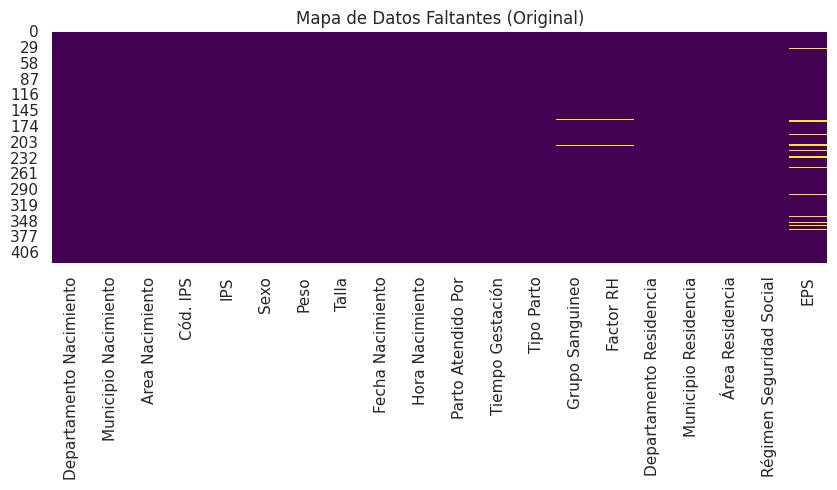

Eliminando filas con datos faltantes...
Número de filas después de eliminar faltantes: 400
Verificando datos faltantes después de la eliminación:
Series([], dtype: int64)
✓ No hay valores faltantes después de la limpieza.
Visualizando datos faltantes (heatmap después de limpieza):


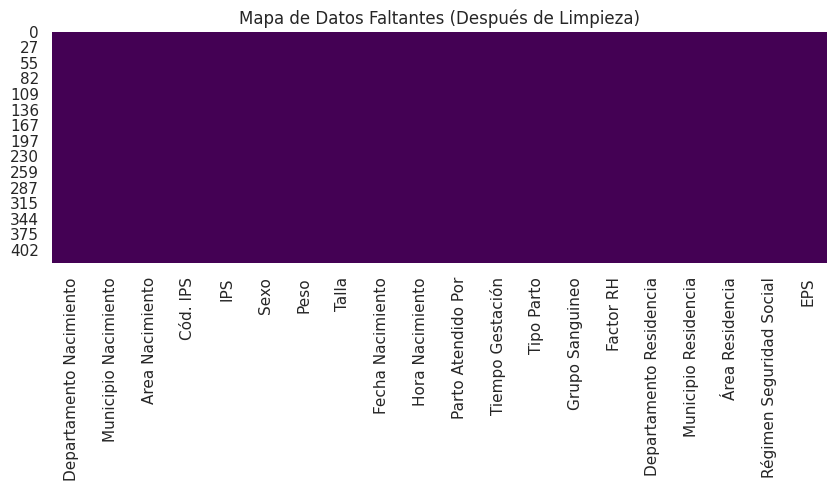


--- CONVERSIÓN DE TIPOS DE DATOS ---
Convirtiendo la columna 'Peso' a numérica...
✓ 'Peso' convertido a tipo: float64

ELIMINACIÓN DE ATÍPICOS (OUTLIERS)
Detectando y eliminando atípicos para 'Talla' y 'Peso' usando el método IQR...
Se encontraron y eliminaron 28 atípicos en 'Talla' y 'Peso'.
Número de filas después de eliminar atípicos: 372
Visualizando distribuciones después de eliminar atípicos:


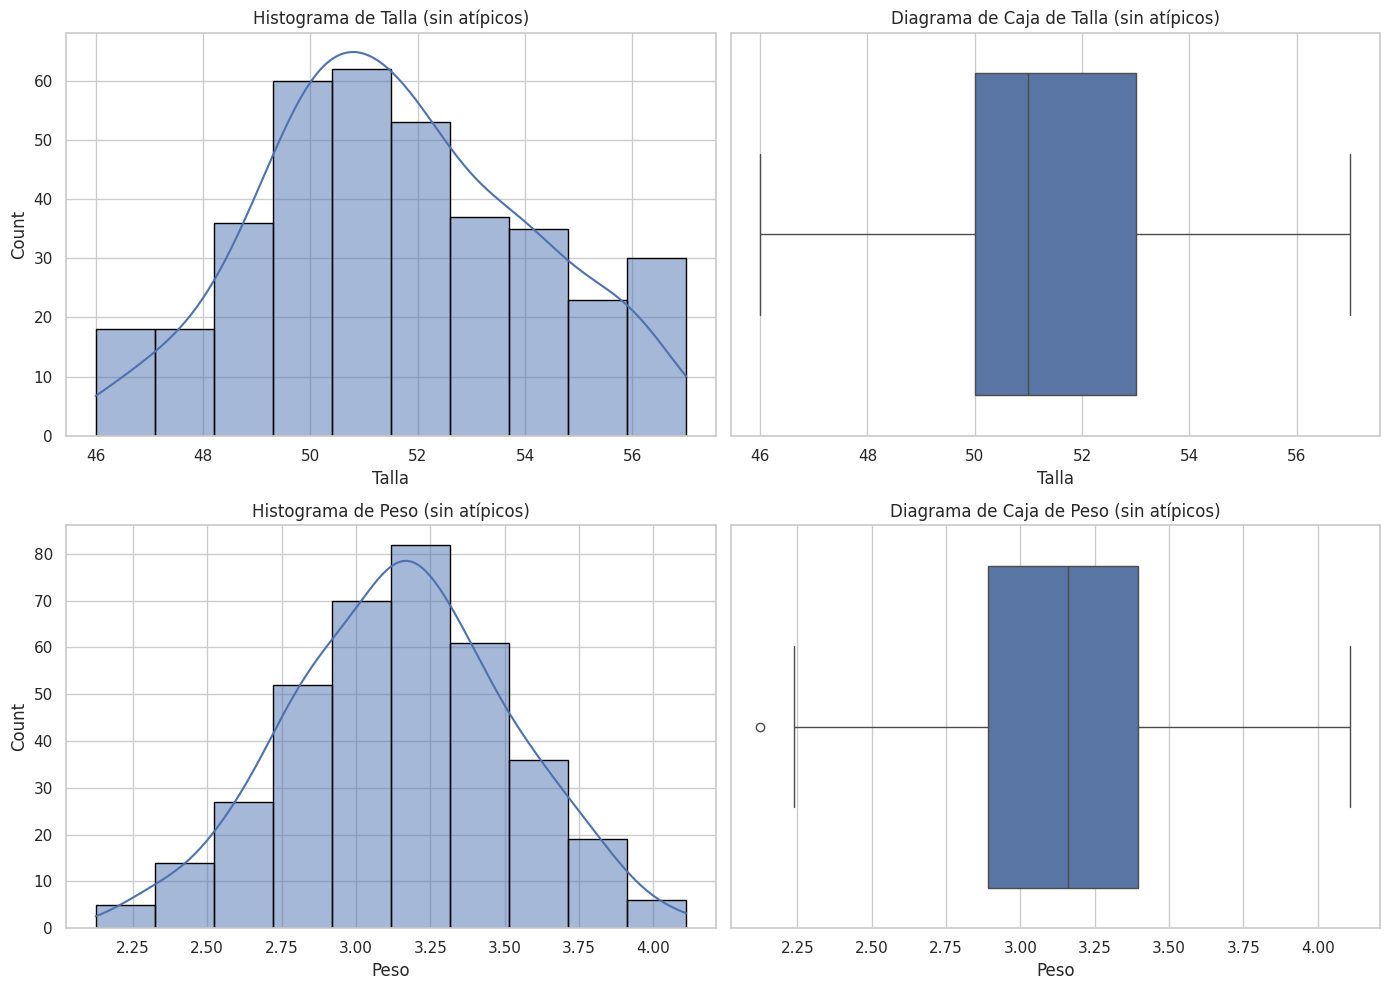


CÁLCULO DE ESTADÍSTICAS DESCRIPTIVAS

--- ESTADÍSTICAS DESCRIPTIVAS PARA VARIABLES NUMÉRICAS ---
|       | Peso     | Talla   | Tiempo Gestación   |
|:------|:---------|:--------|:-------------------|
| count | 372      | 372     | 372                |
| mean  | 3.14698  | 51.5833 | 38.1935            |
| std   | 0.370894 | 2.48576 | 1.25041            |
| min   | 2.125    | 46      | 33                 |
| 25%   | 2.89     | 50      | 38                 |
| 50%   | 3.16     | 51      | 38                 |
| 75%   | 3.395    | 53      | 39                 |
| max   | 4.11     | 57      | 41                 |

--- DISTRIBUCIÓN DE FRECUENCIAS PARA VARIABLES CATEGÓRICAS ---

--- Sexo ---
| Sexo      | count   |
|:----------|:--------|
| MASCULINO | 189     |
| FEMENINO  | 183     |

--- Tipo Parto ---
| Tipo Parto   | count   |
|:-------------|:--------|
| ESPONTÁNEO   | 195     |
| CESÁREA      | 177     |

--- Area Nacimiento ---
| Area Nacimiento    | count   |
|:-------------------|

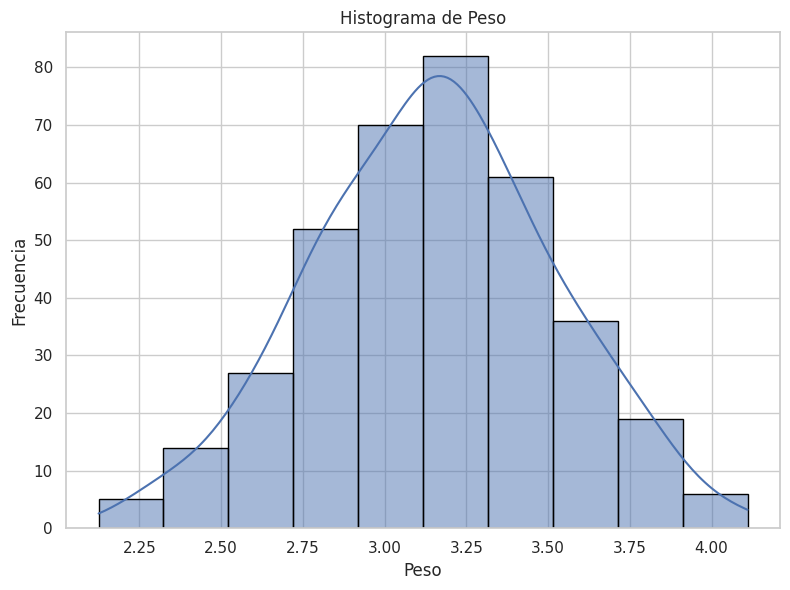

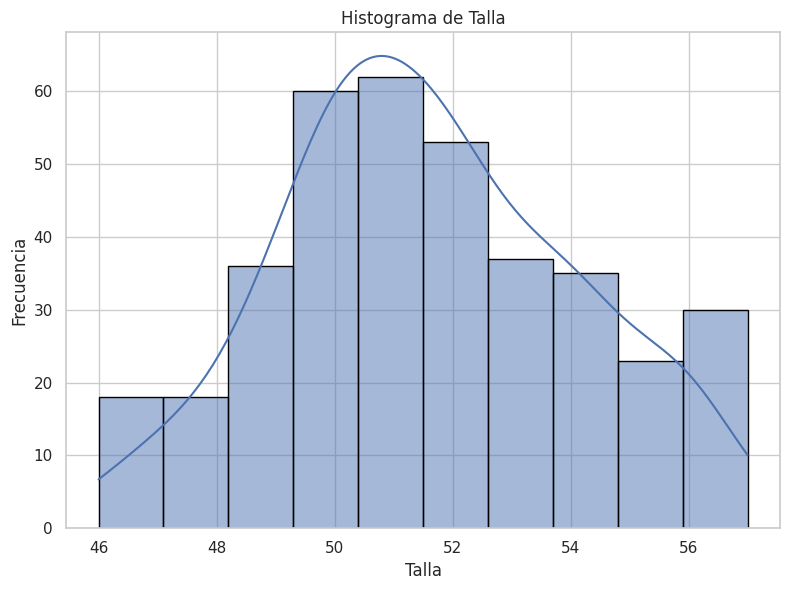

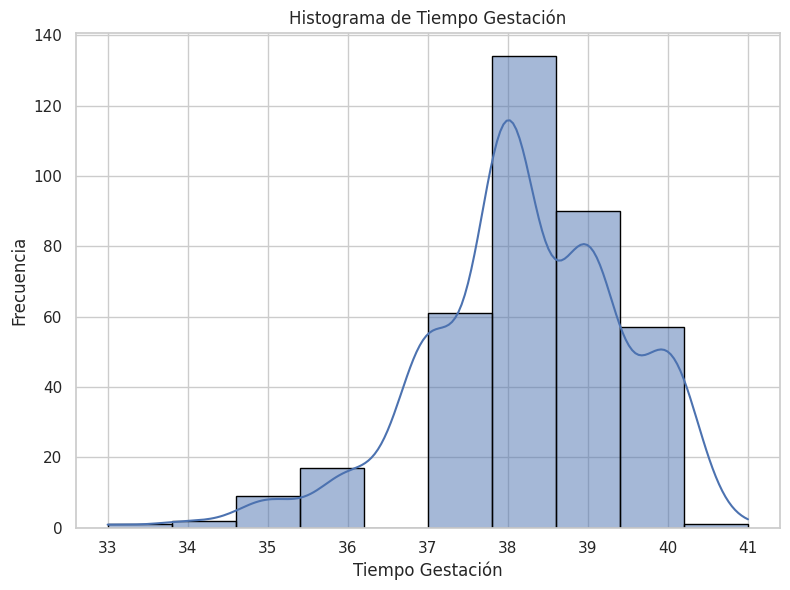


--- DIAGRAMAS DE CAJA PARA VARIABLES NUMÉRICAS ---


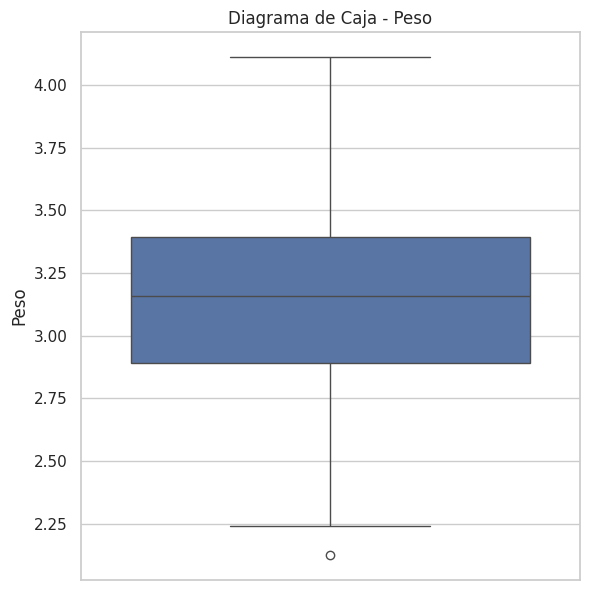

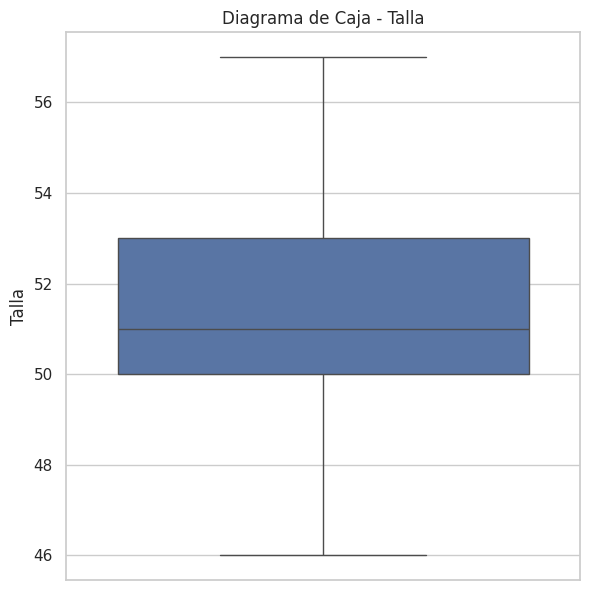

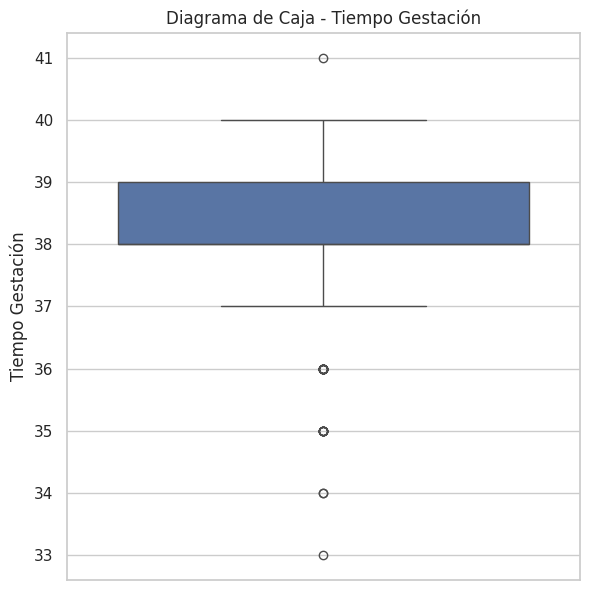


--- GRÁFICOS DE PASTEL/BARRAS PARA VARIABLES CATEGÓRICAS ---


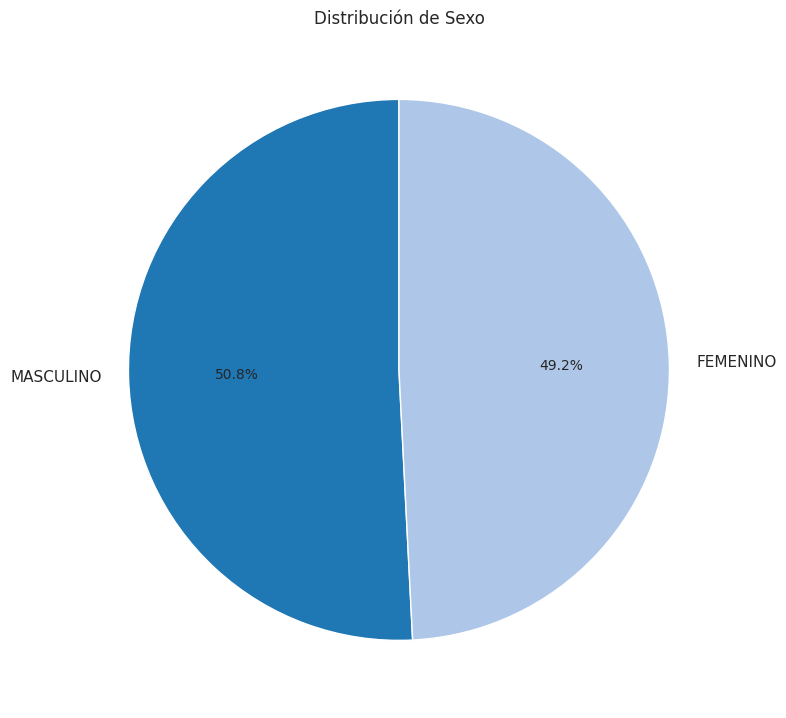

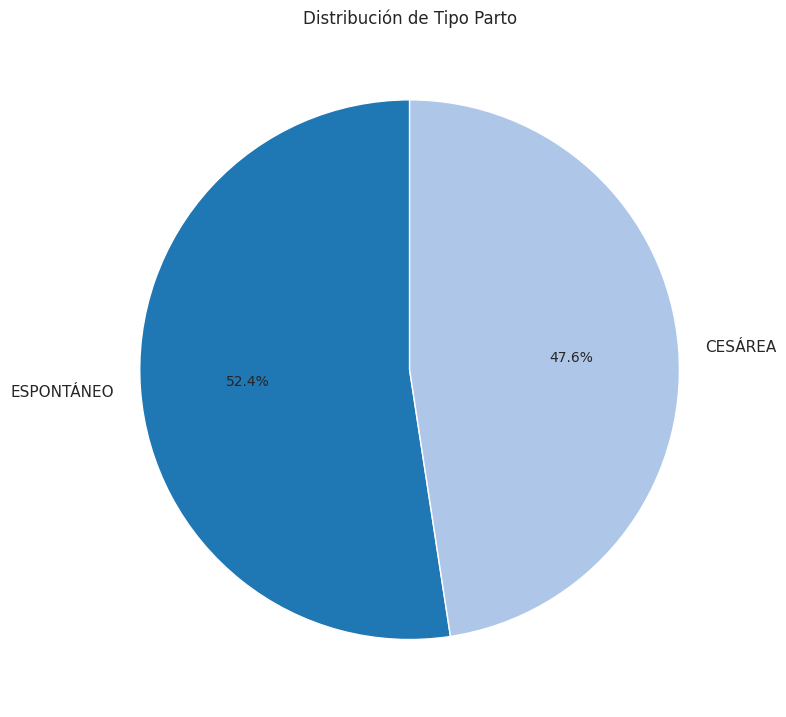

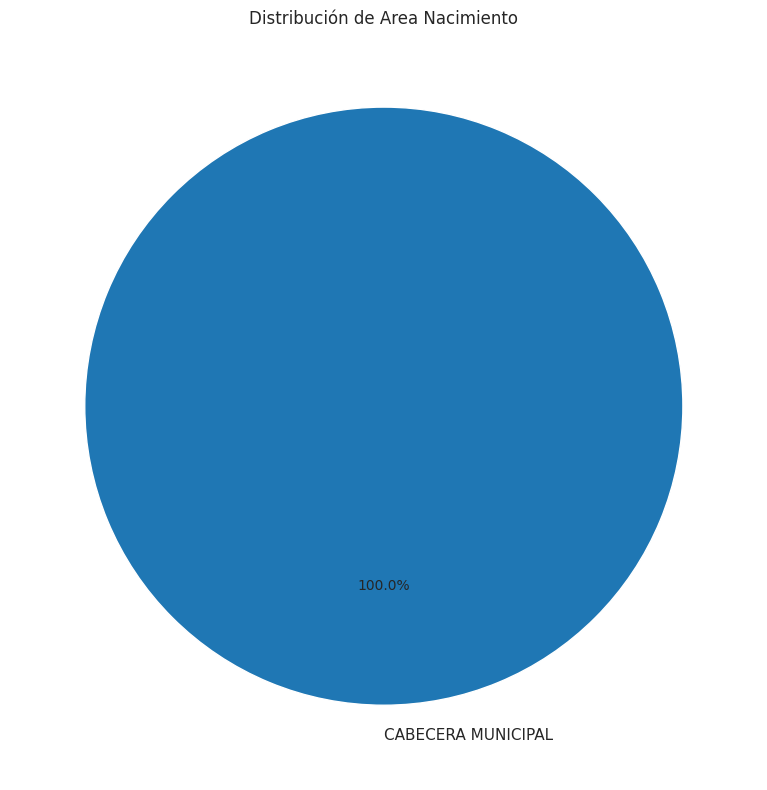

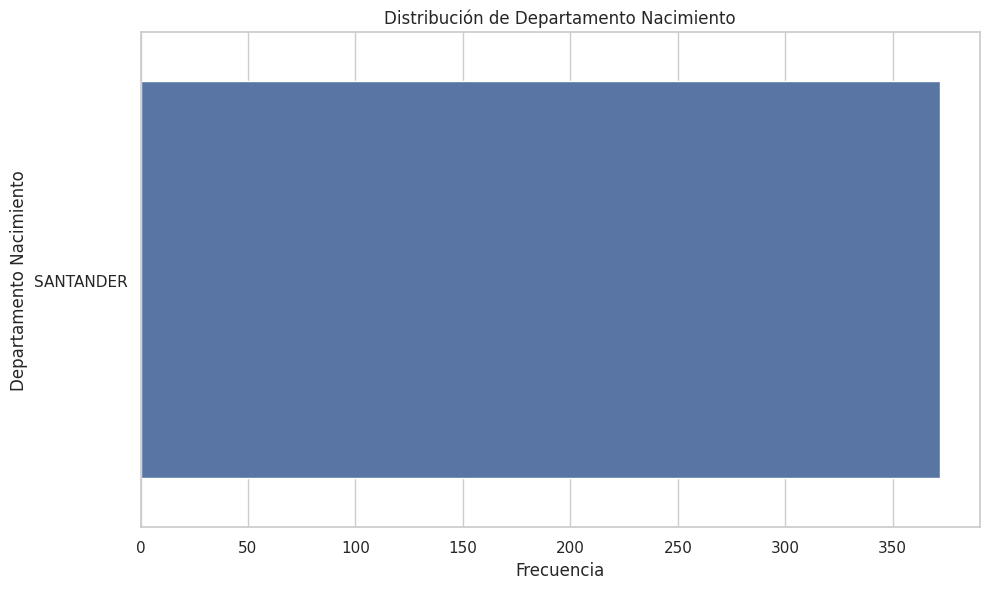

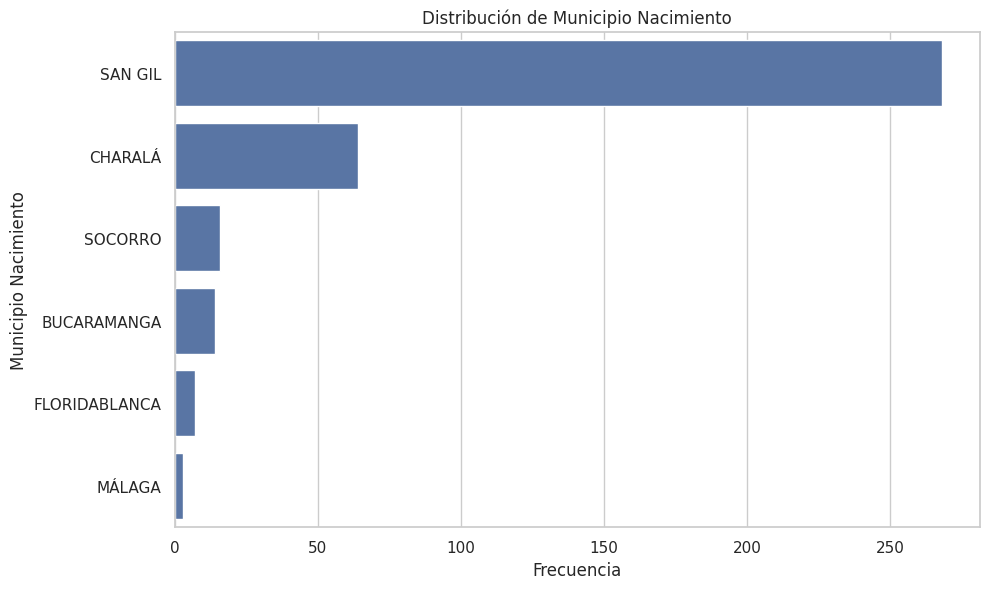

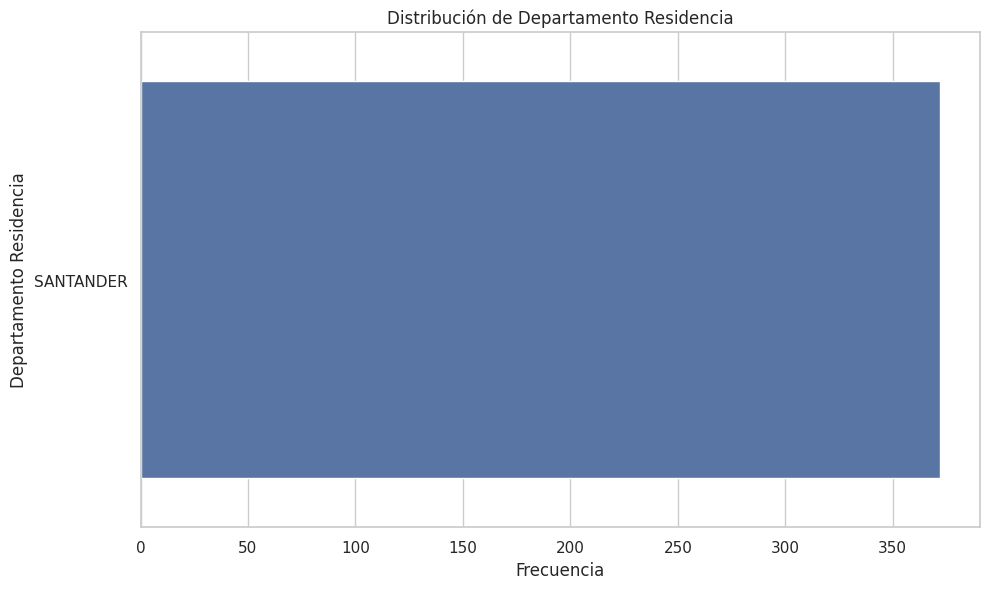

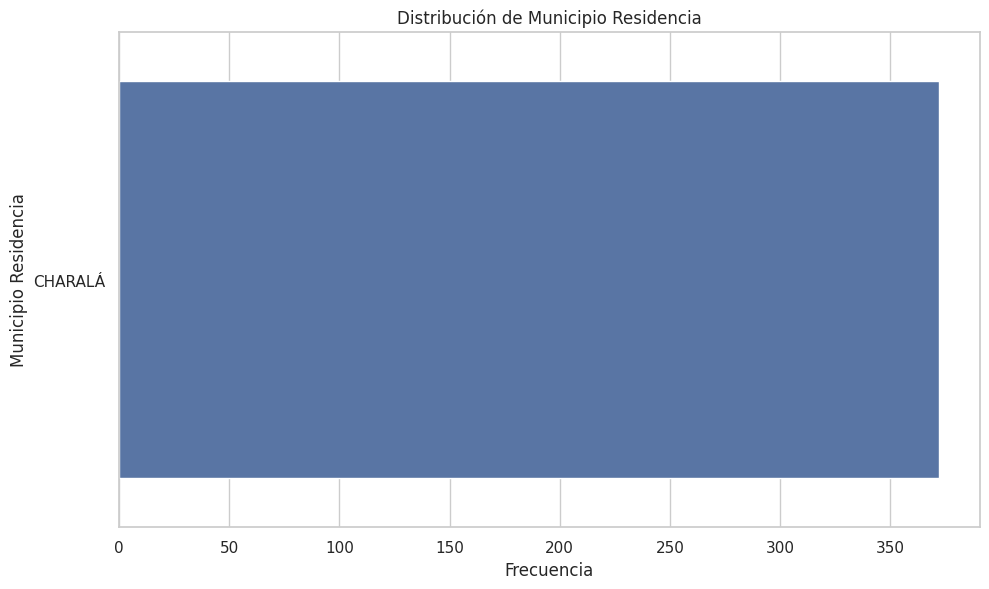

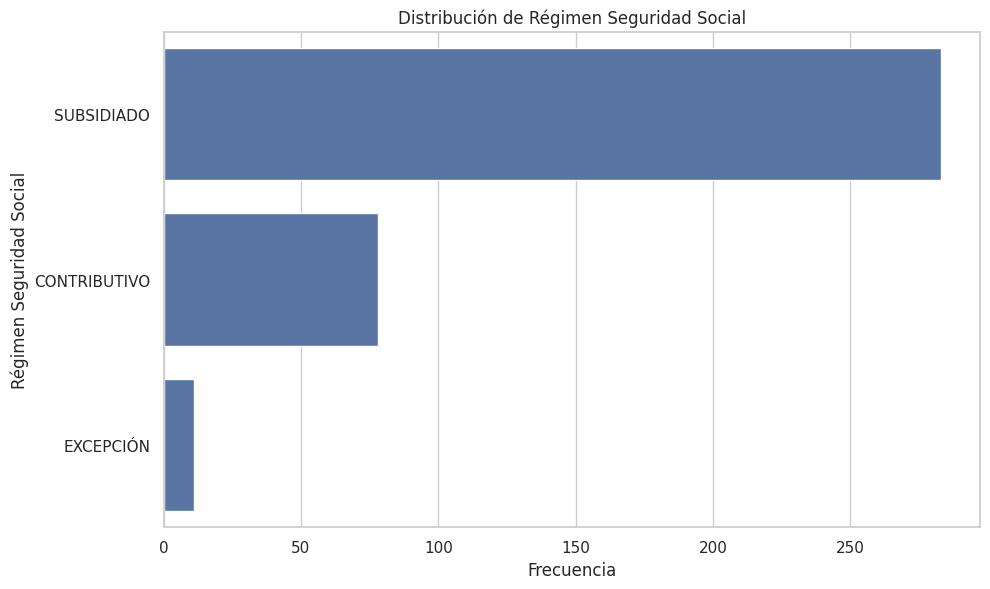

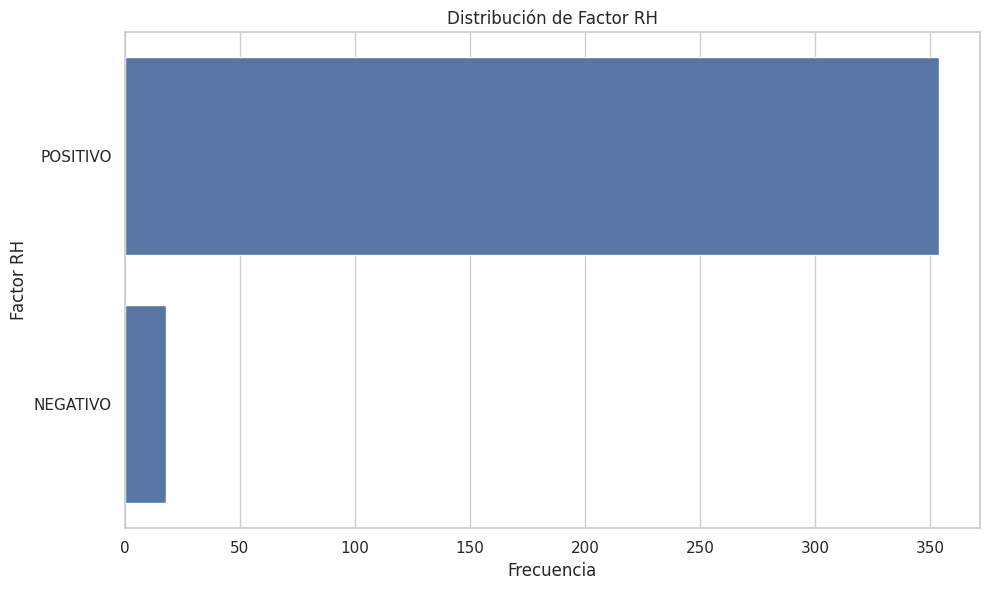

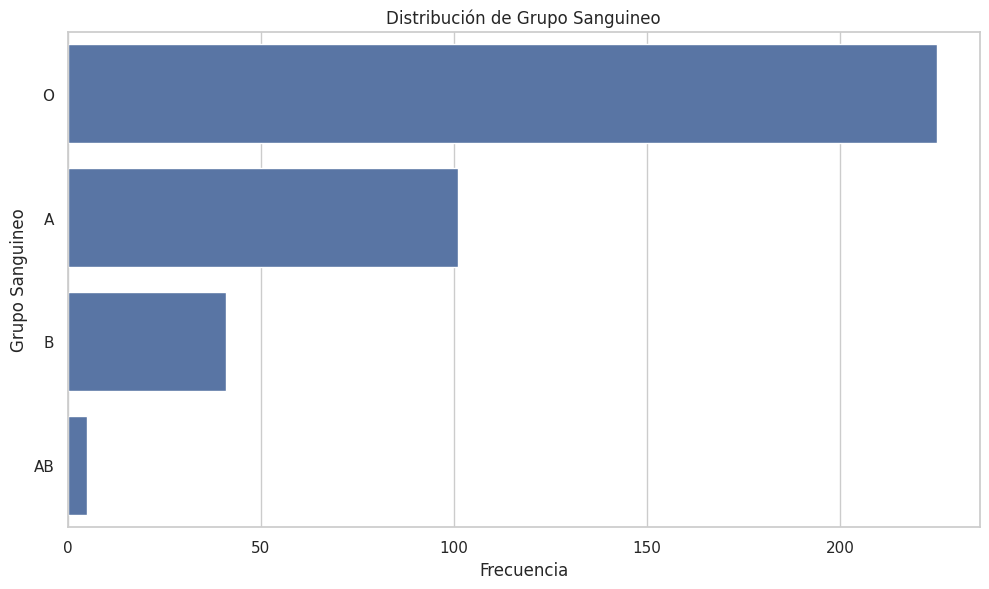

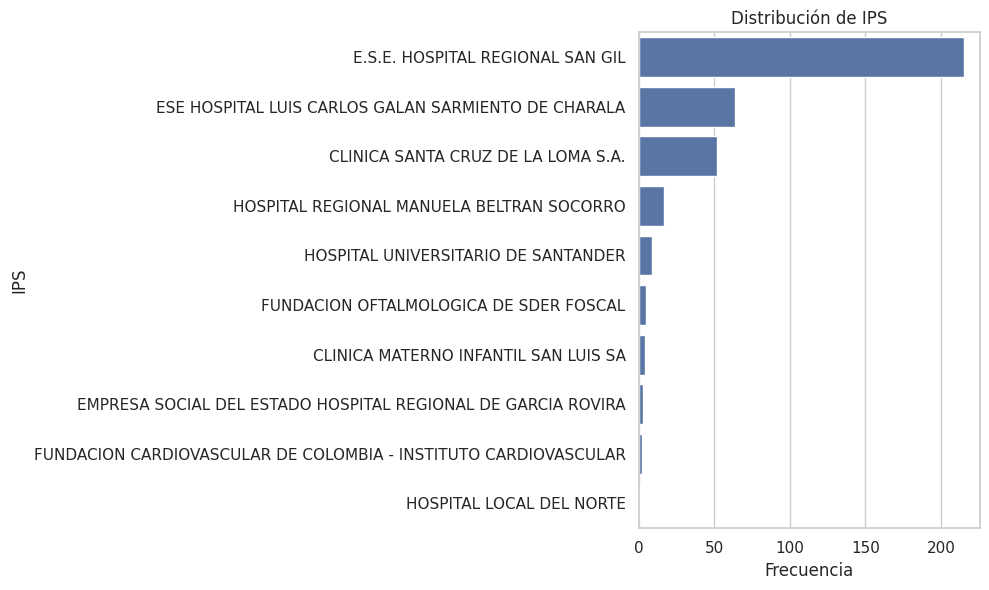

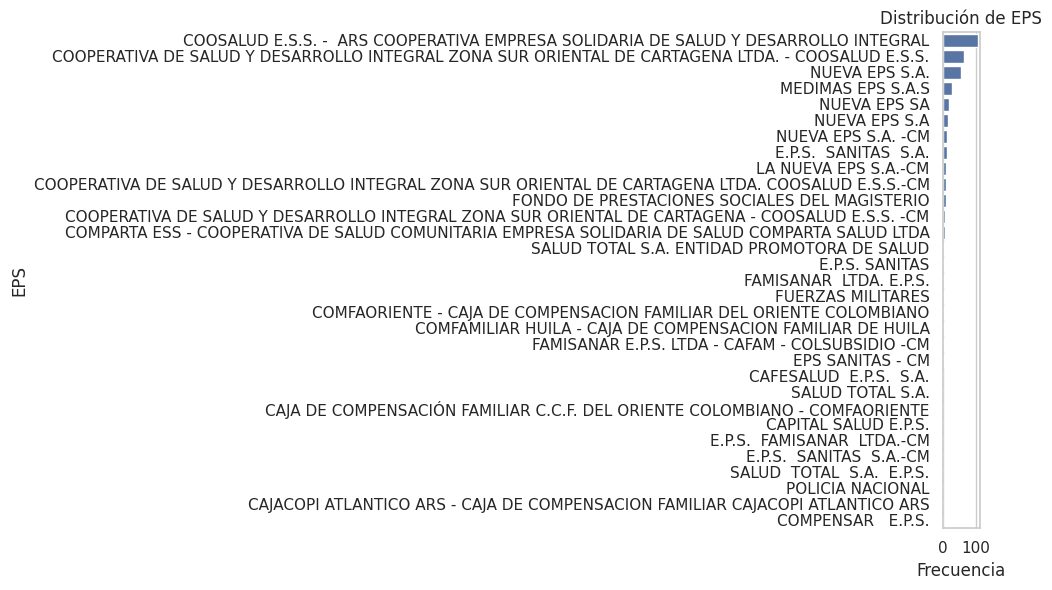


ANÁLISIS DE NORMALIDAD (TESTS ESTADÍSTICOS Y GRÁFICOS Q-Q)
Realizando tests de normalidad y generando gráficos Q-Q para variables numéricas...

--- RESULTADOS DE LOS TESTS DE NORMALIDAD ---

Variable: Peso
  Shapiro-Wilk p = 0.8122
  Kolmogorov-Smirnov p = 0.9817
  Anderson-Darling Estadístico: 0.1694, Crítico (5%): 0.7790
  Jarque-Bera p = 0.6136
  → Conclusión: La distribución podría considerarse normal (según la mayoría de los tests válidos).

Variable: Talla
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0001
  Anderson-Darling Estadístico: 3.4205, Crítico (5%): 0.7790
  Jarque-Bera p = 0.0893
  → Conclusión: La distribución NO parece ser normal (según la mayoría de los tests válidos).

Variable: Tiempo Gestación
  Shapiro-Wilk p = 0.0000
  Kolmogorov-Smirnov p = 0.0000
  Anderson-Darling Estadístico: 11.8323, Crítico (5%): 0.7790
  Jarque-Bera p = 0.0000
  → Conclusión: La distribución NO parece ser normal (según la mayoría de los tests válidos).

--- GRÁFICOS Q-Q PARA VARI

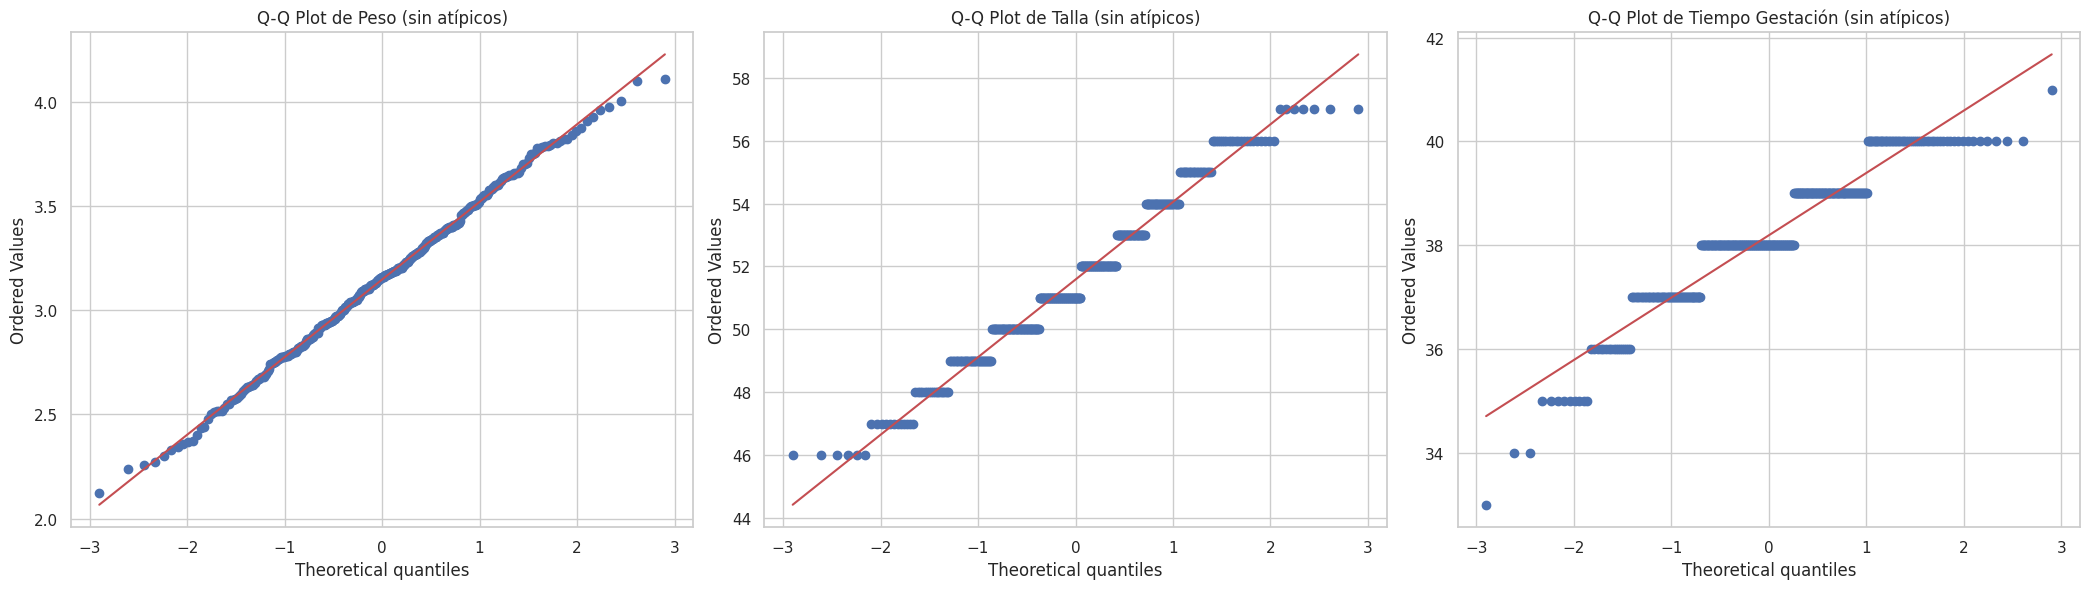


ANÁLISIS EXPLORATORIO DE DATOS COMPLETADO


In [2]:
def main():
    print("Bienvenido al Analizador de Datos de Nacimientos.")
    ruta_archivo = input("Por favor, ingrese la ruta completa del archivo CSV de nacimientos: ")
    analizador = AnalizadorNacimientos(ruta_archivo)
    analizador.ejecutar_analisis_completo()

# Execute the redefined main function
main()

## Final Task

### Subtask:
Proporcionar un resumen del análisis realizado y los resultados obtenidos.


## Summary:

### Data Analysis Key Findings

*   **Dataset Overview**: The analysis began with a dataset of 424 entries and 20 columns.
*   **Data Cleaning and Preparation**:
    *   Initially, missing values were identified in 'Grupo Sanguineo', 'Factor RH', and 'EPS'. All rows with missing values were removed, reducing the dataset from 424 to 400 rows.
    *   The 'Peso' column was successfully converted from an `object` type to `float64` by replacing commas with periods. 'Tiempo Gestación' was also ensured to be a numeric type.
    *   Outliers in 'Talla' and 'Peso' were detected and removed using the Interquartile Range (IQR) method, leading to a further reduction of 28 rows, resulting in 372 rows for the final analysis.
*   **Descriptive Statistics**: Comprehensive descriptive statistics (count, mean, standard deviation, minimum, maximum, and quartiles) were computed for the numerical variables ('Peso', 'Talla', 'Tiempo Gestación'). Frequency distributions were also generated for all categorical variables.
*   **Visualizations**: A range of visualizations was produced:
    *   Histograms and box plots for numerical variables ('Peso', 'Talla', 'Tiempo Gestación').
    *   Pie charts for categorical variables with few unique values (e.g., 'Sexo', 'Tipo Parto', 'Area Nacimiento').
    *   Bar plots for categorical variables with more unique values, showcasing the top categories (e.g., 'Municipio Nacimiento', 'IPS', 'EPS').
*   **Normality Analysis (Statistical Tests and Q-Q Plots)**:
    *   **Peso**: Most statistical tests (Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, Jarque-Bera) indicated that the 'Peso' variable **could be considered normally distributed**.
    *   **Talla**: The majority of statistical tests suggested that the 'Talla' variable **is NOT normally distributed**.
    *   **Tiempo Gestación**: Similarly, most statistical tests concluded that the 'Tiempo Gestación' variable **is NOT normally distributed**.
    *   Q-Q plots visually supported these findings for each numerical variable.

### Insights or Next Steps

*   Given that 'Talla' and 'Tiempo Gestación' do not follow a normal distribution, future statistical modeling involving these variables should consider non-parametric tests or transformations if parametric assumptions are required.
*   Further investigation could explore potential correlations between 'Talla' and 'Tiempo Gestación' with other categorical variables (e.g., 'Tipo Parto', 'Régimen Seguridad Social') to understand factors influencing their non-normal distributions.
